In [1]:
import pandas as pd
import numpy as np
import datetime
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute

In [2]:
traindata = pd.read_csv("C:/Users/v4run/Downloads/train.csv")

In [3]:
traindata.head(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
5,1,State_1,Commercial,Warehouse_Selfstorage,119900.0,1956.0,NaN,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,6.597715,5
6,1,State_1,Commercial,Warehouse_Nonrefrigerated,91367.0,1982.0,56.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,12.817841,6
7,1,State_1,Commercial,Warehouse_Nonrefrigerated,50422.0,1947.0,99.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,22.392014,7
8,1,State_1,Commercial,Office_Uncategorized,122020.0,1929.0,98.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,28.199578,8
9,1,State_1,Commercial,Office_Uncategorized,102612.0,1979.0,83.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,29.515952,9


In [4]:
traindata.shape

(75757, 64)

In [5]:
traindata.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
missingper = ((traindata.isna().sum())/traindata.shape[0])*100
missingper = pd.DataFrame(missingper,columns=['MissingPer'])
missingper['MissingValue'] = traindata.isna().sum()

In [8]:
missingper.T.style

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
MissingPer,0.000000,0.000000,0.000000,0.000000,0.000000,2.424858,35.256148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.228652,55.190939,54.228652,60.451179,0.000000,0.000000
MissingValue,0.000000,0.000000,0.000000,0.000000,0.000000,1837.000000,26709.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41082.000000,41811.000000,41082.000000,45796.000000,0.000000,0.000000


In [9]:
missingpercol = missingper[(missingper['MissingValue']>0)]

In [10]:
col = list(missingpercol.index)

<AxesSubplot:>

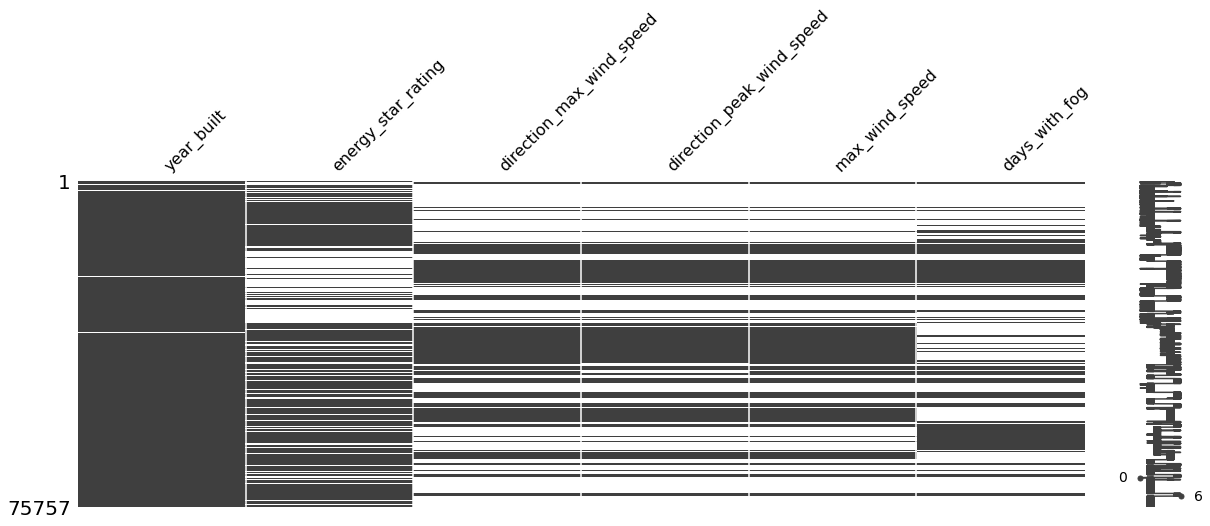

In [11]:
mno.matrix(traindata[col],figsize=(20,6))

Exploring object columns

In [12]:
objectcol = traindata.select_dtypes('object')

In [13]:
colmlist = list(objectcol.columns)

In [14]:
for i in colmlist:
    print(objectcol[i].unique())

['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
['Commercial' 'Residential']
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assembly_Recreation' 'Service_Uncategorized'
 'War

In [15]:
def drawplot(col):
  plt.figure(figsize=(16,6))
  sns.countplot(traindata[col], palette = "colorblind")
  plt.xticks(rotation="vertical")

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


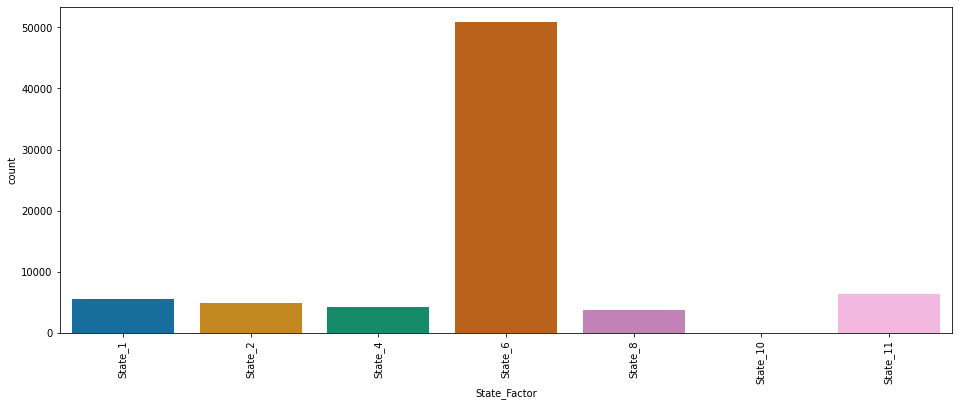

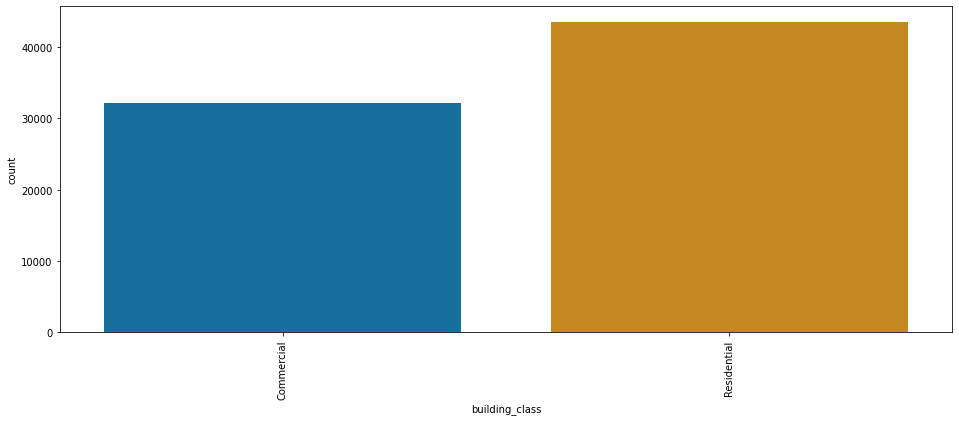

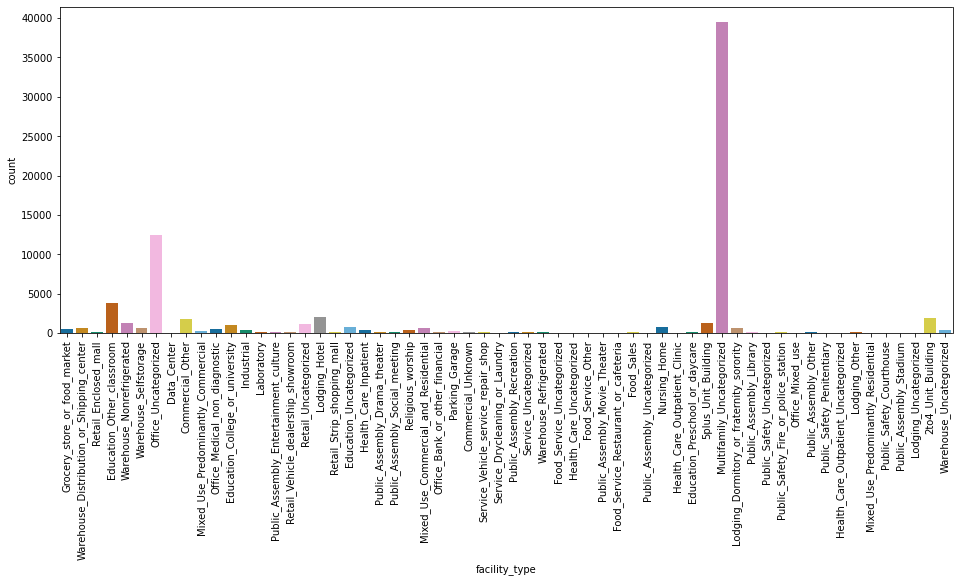

In [16]:
view = colmlist
for colu in view:
  drawplot(colu)

# SAVE TARGET VARIABLE DIFFERENTLY FROM COMPLETE DATASET

In [17]:
without_target = traindata.drop(columns={'site_eui','id'})
target = traindata['site_eui']

# Outliers

In [18]:
def find_outliers(col):
    # Finding IQR
    q1 = without_target[col].quantile(0.25)
    q3 = without_target[col].quantile(0.75)
    iqr = q3 - q1
    
    # Finding upper and lower limit
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    # Finding Outliers
    without_target[without_target[col] > upper_limit]
    without_target[without_target[col] < lower_limit]
    
    # Trimming
    new_df = without_target[without_target[col] < upper_limit]
    
    # Comparing plots after trimming
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(without_target[col])
    plt.subplot(2,2,2)
    sns.boxplot(without_target[col])
    plt.subplot(2,2,3)
    sns.distplot(new_df[col])
    plt.subplot(2,2,4)
    sns.boxplot(new_df[col])

In [19]:
train_num = without_target.drop(columns = {'State_Factor', 'building_class', 'facility_type'})

In [20]:
num_col = list(train_num.columns)

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Pyt

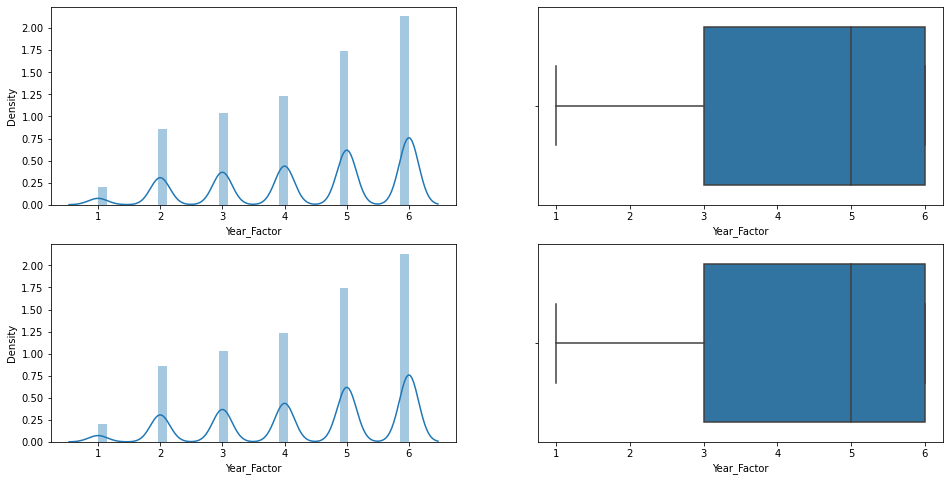

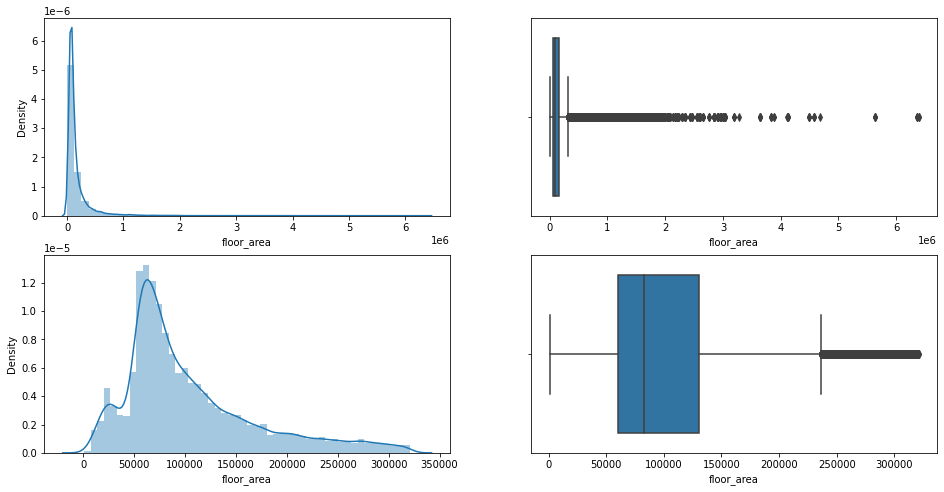

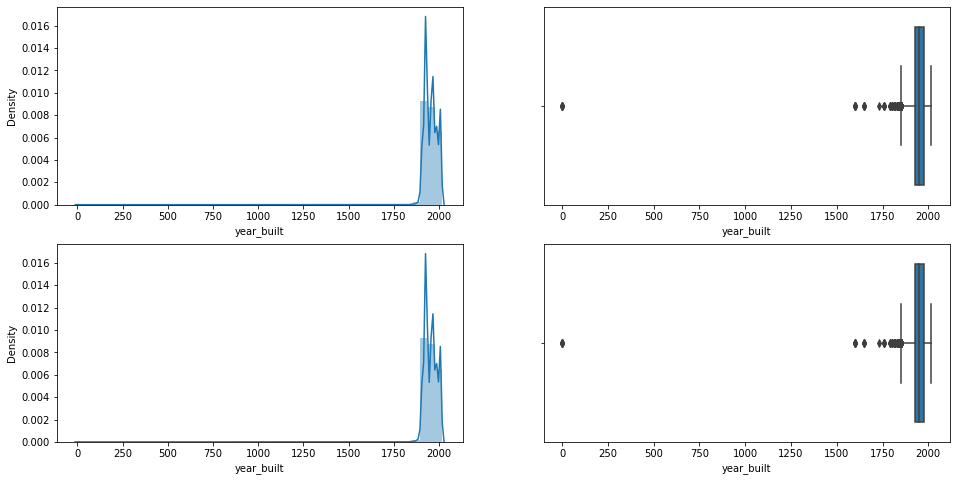

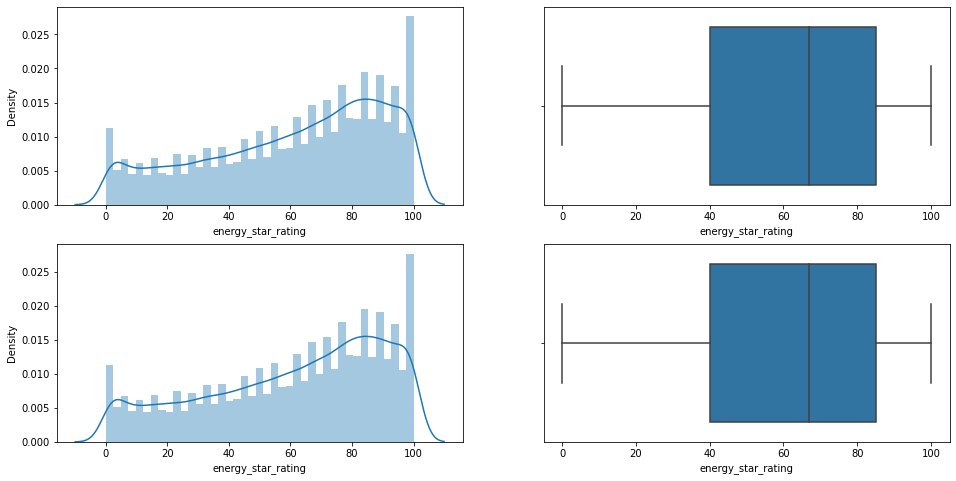

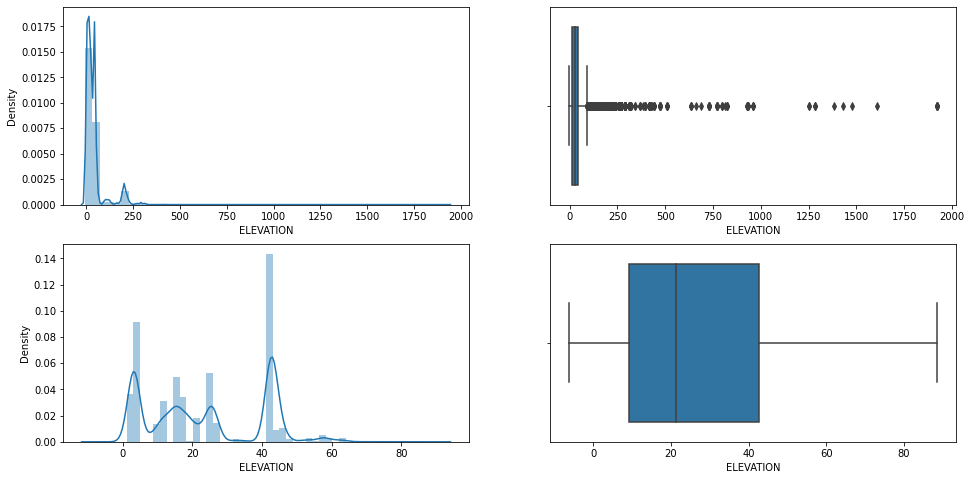

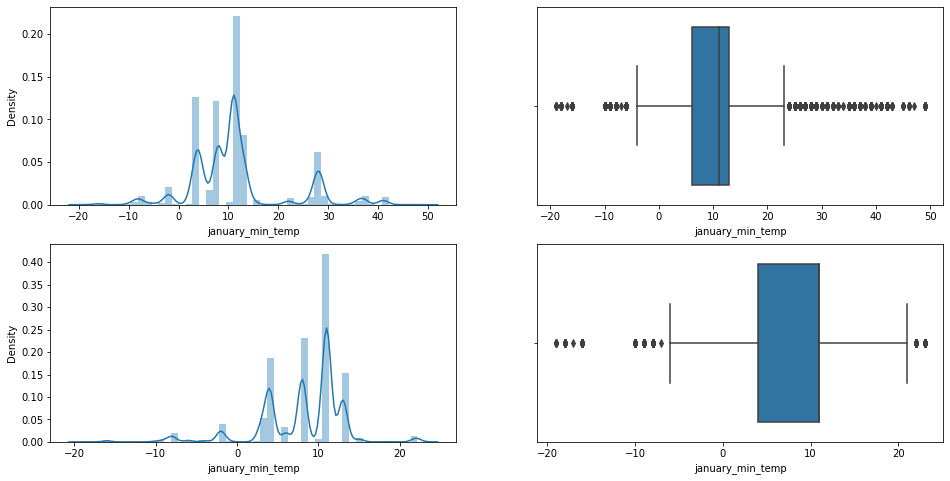

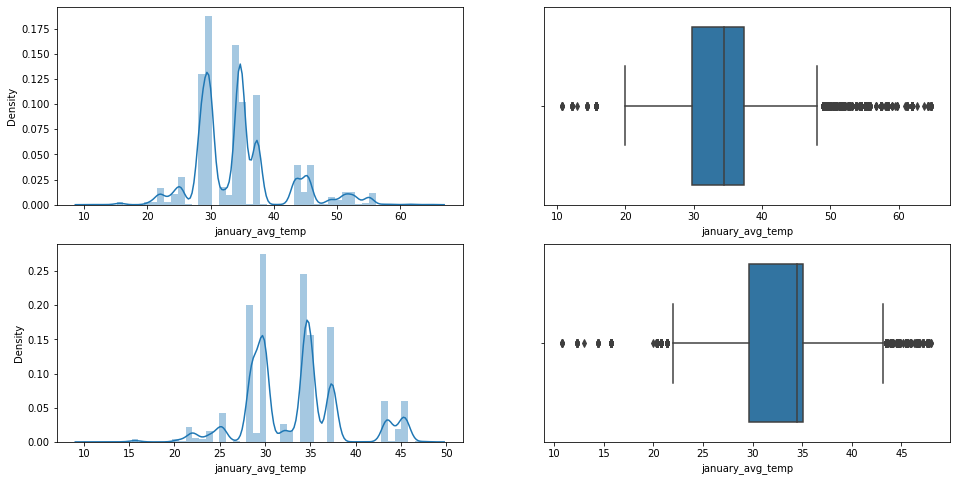

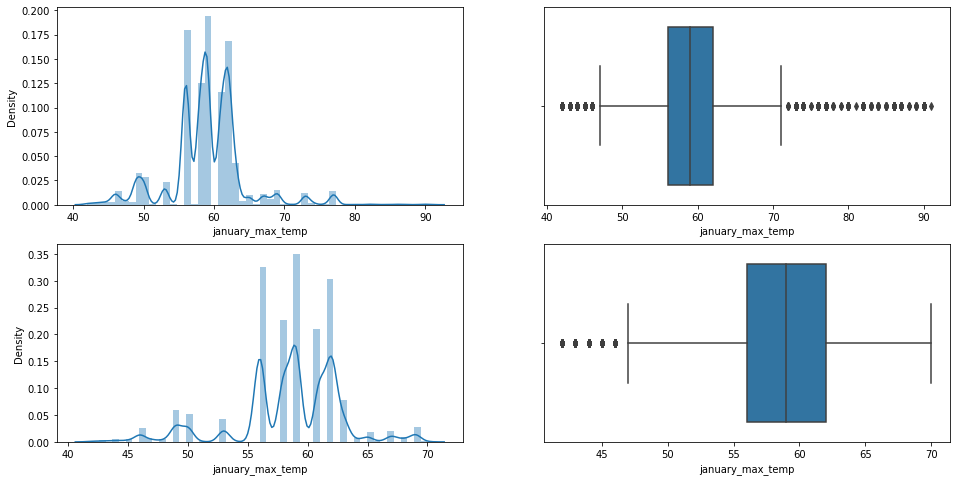

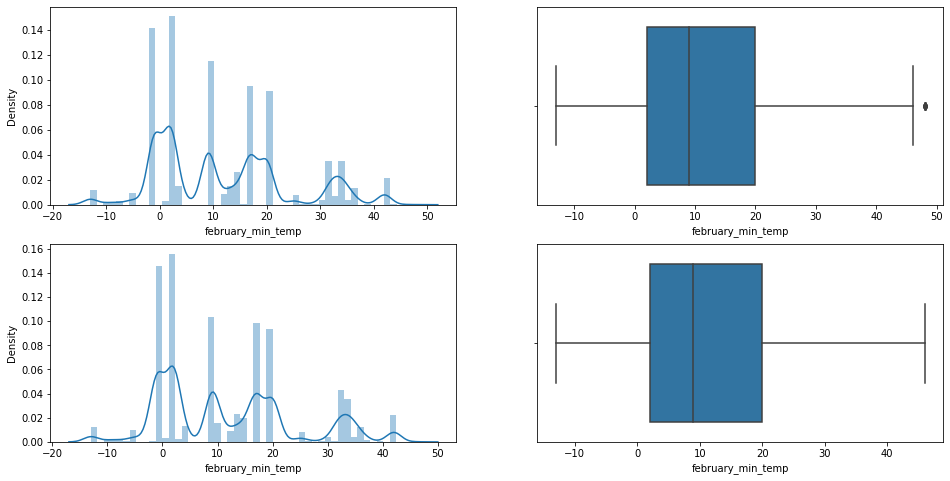

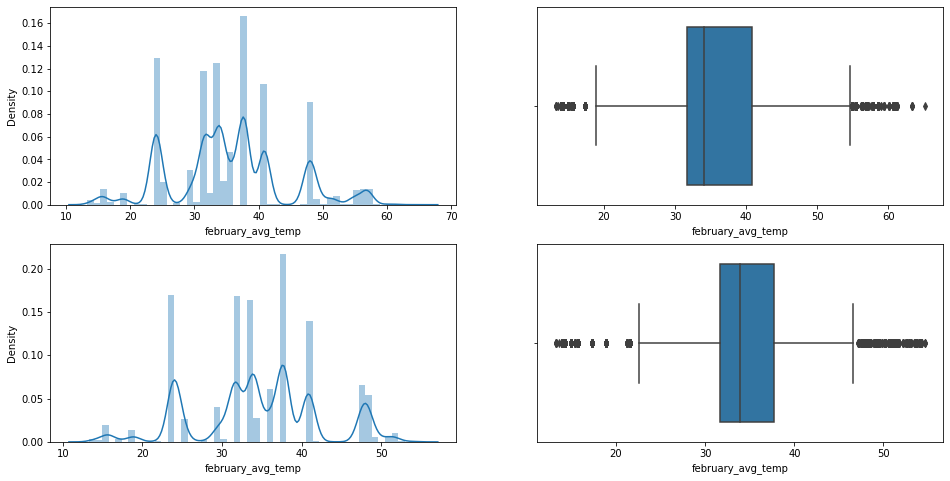

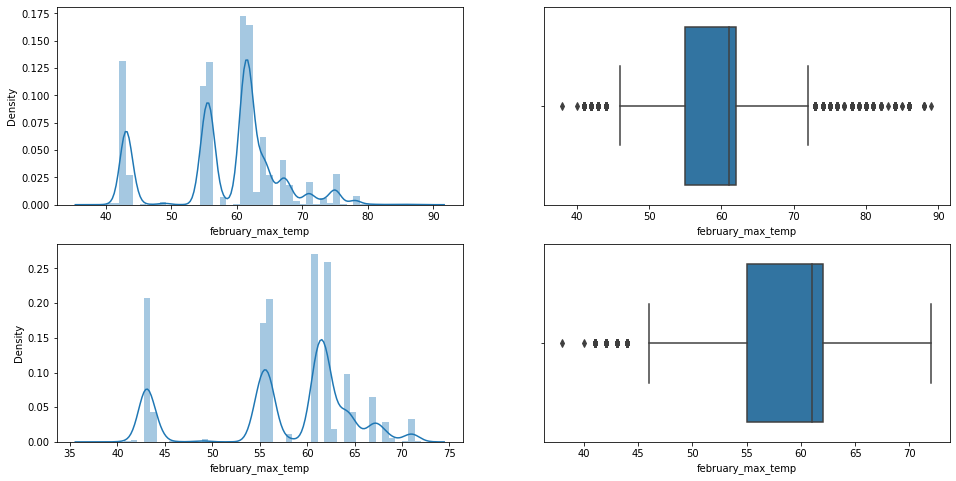

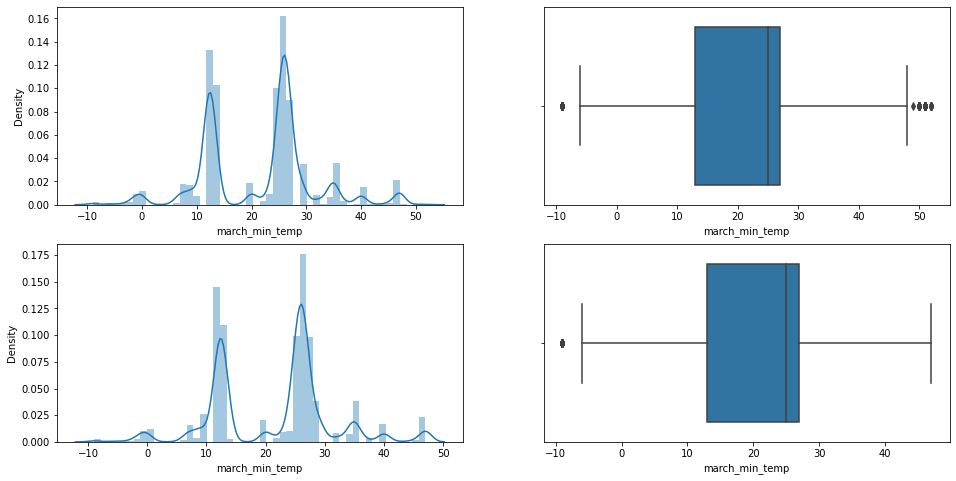

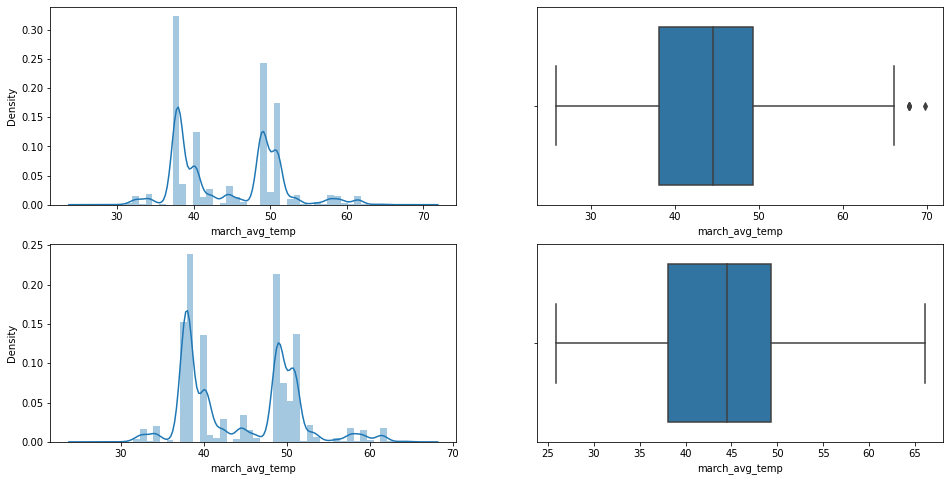

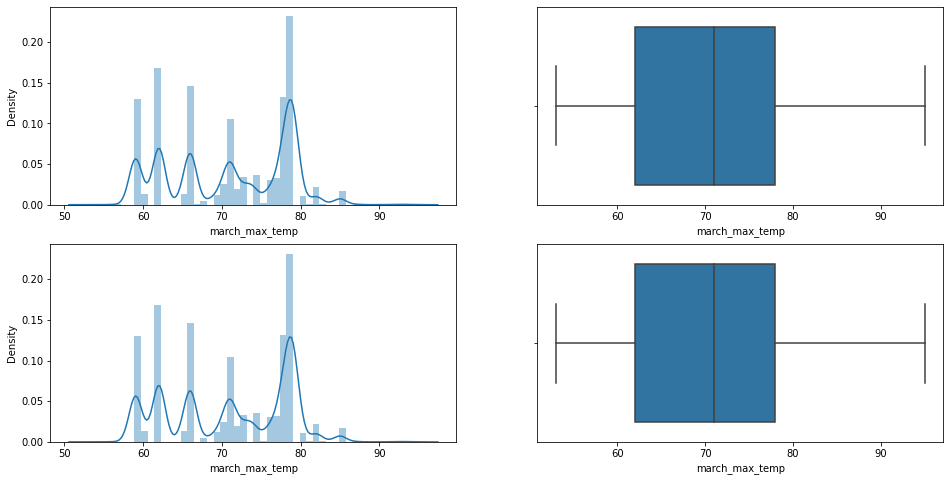

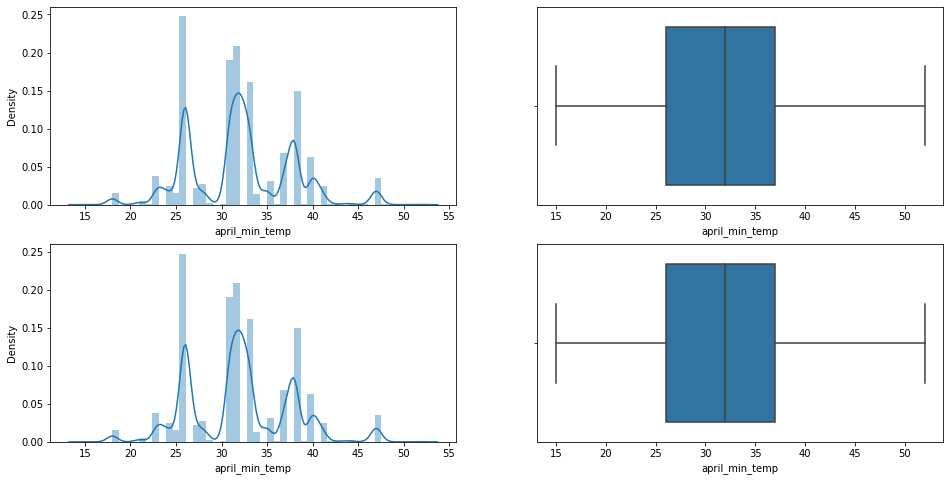

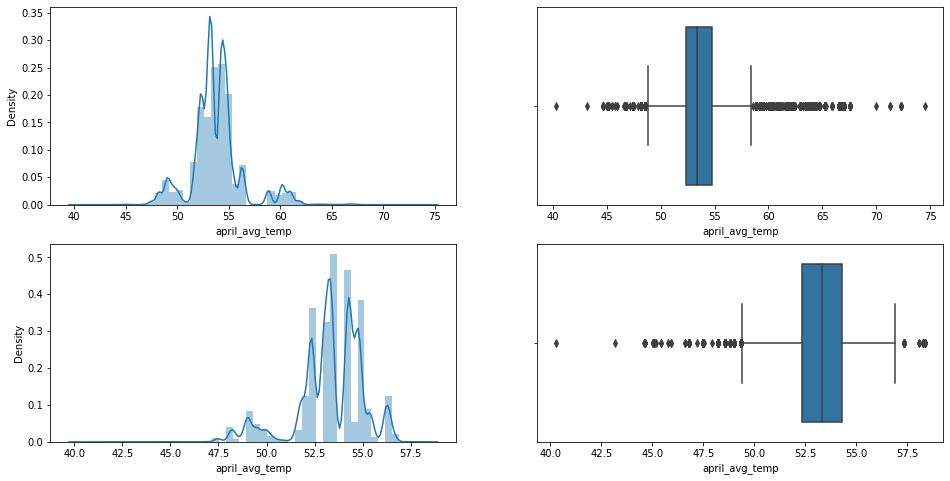

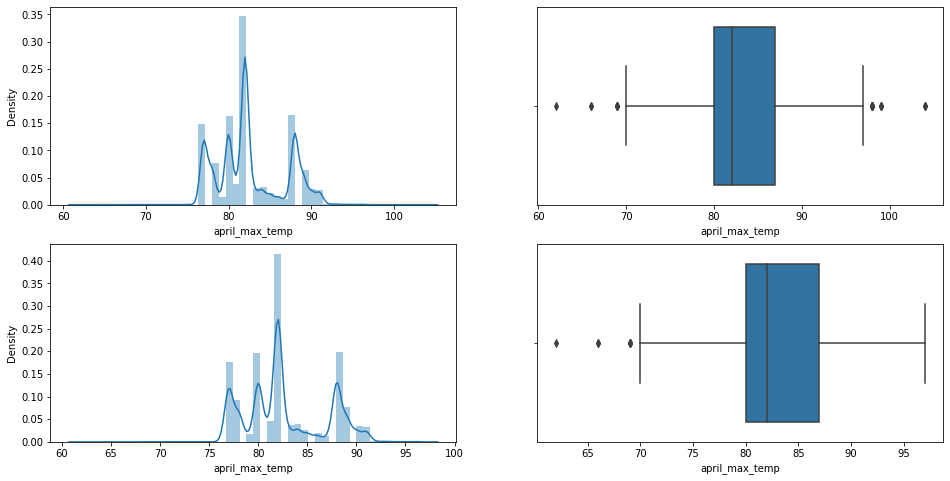

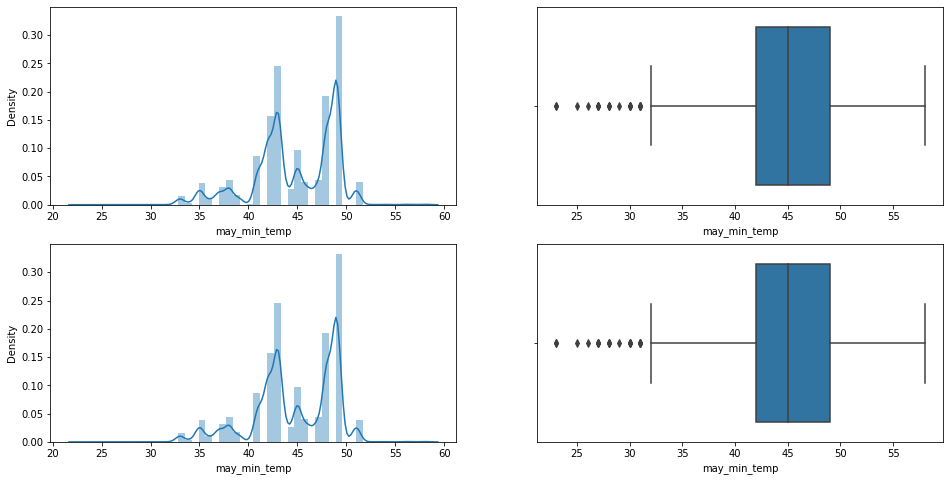

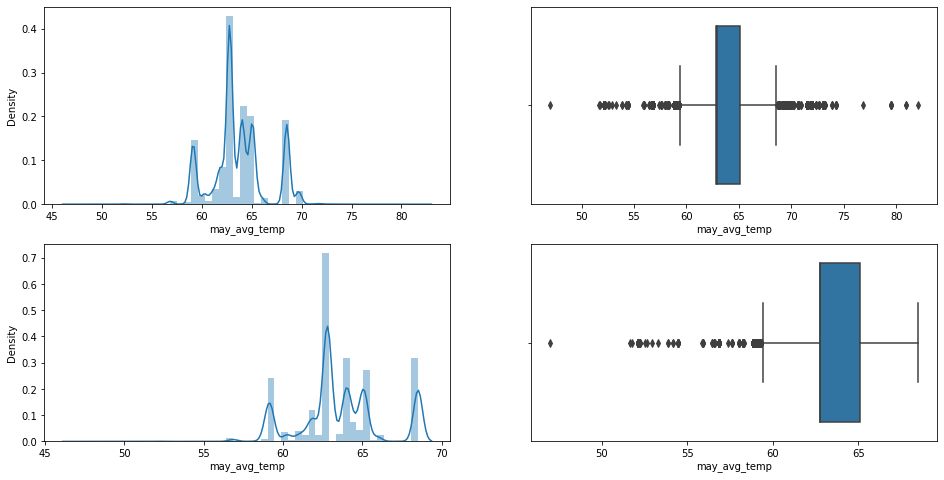

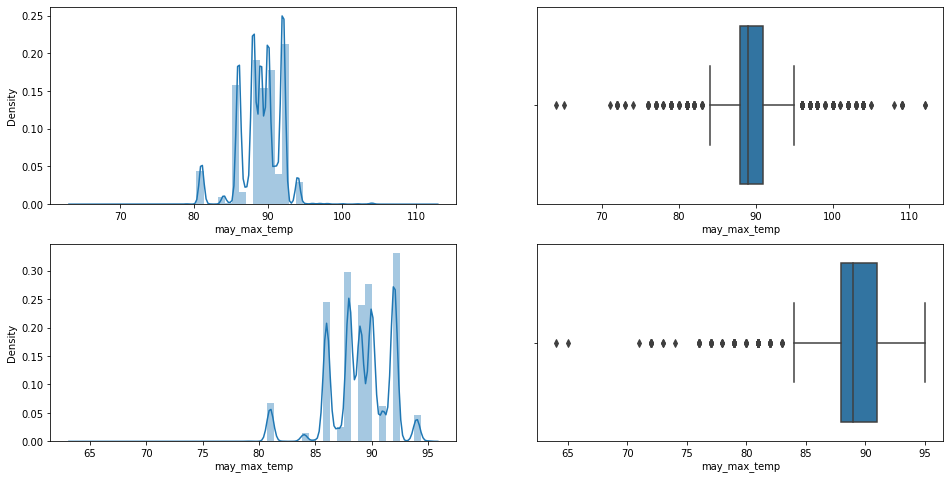

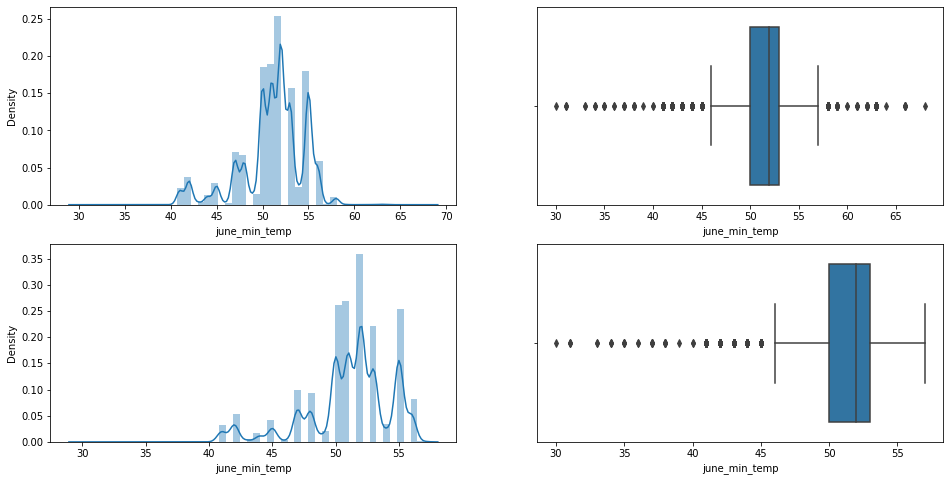

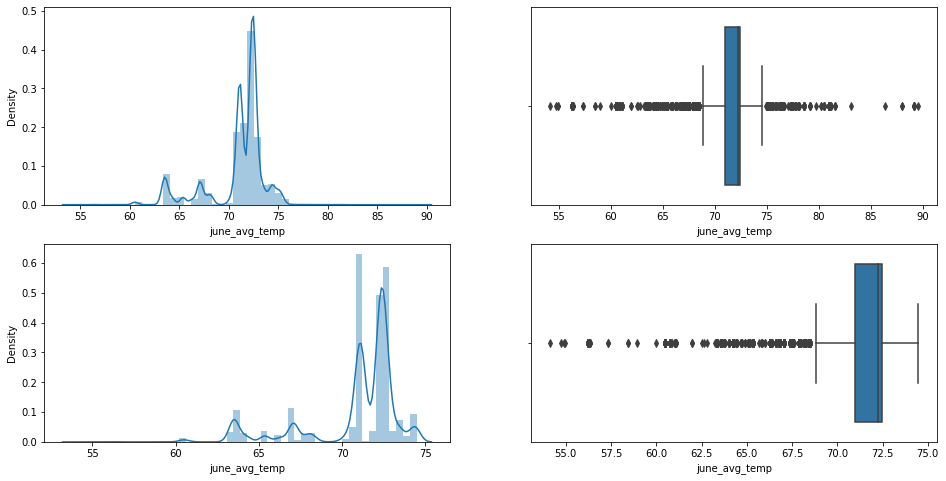

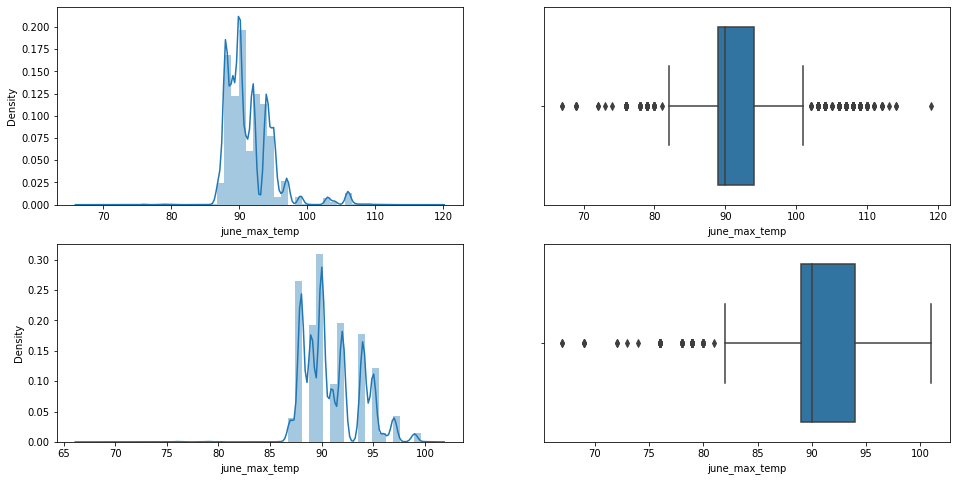

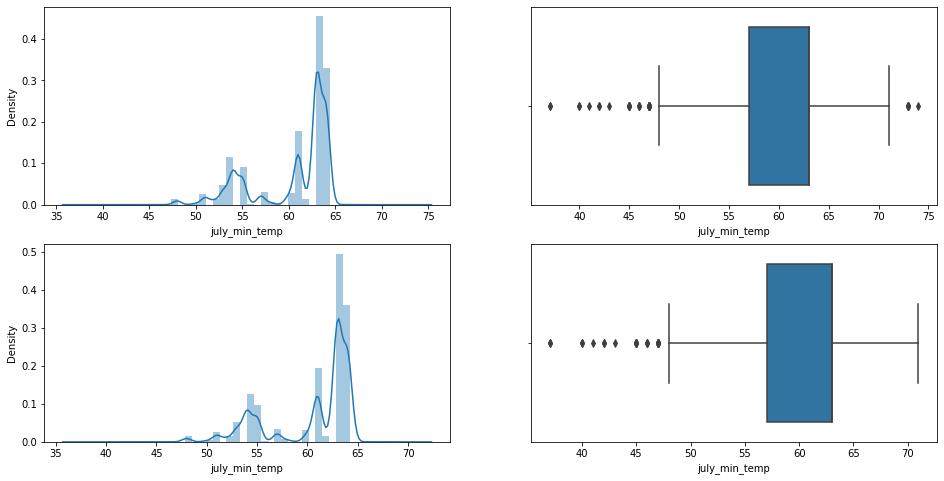

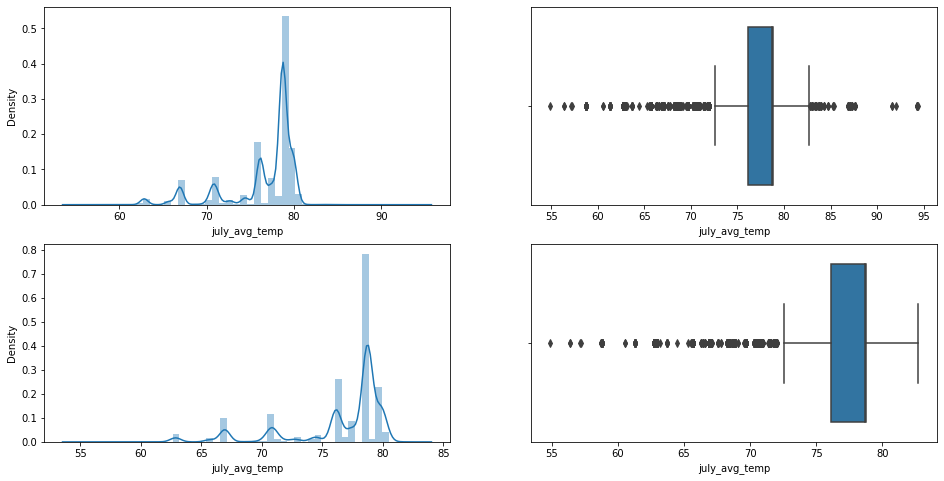

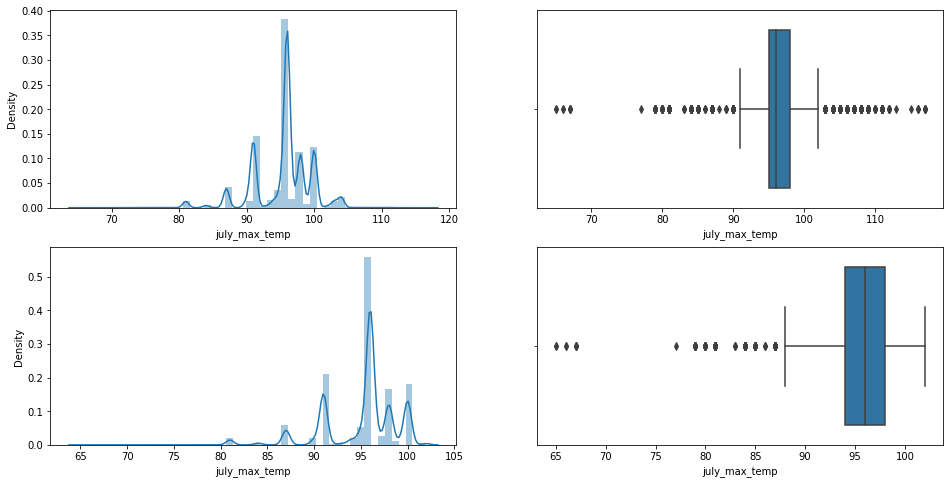

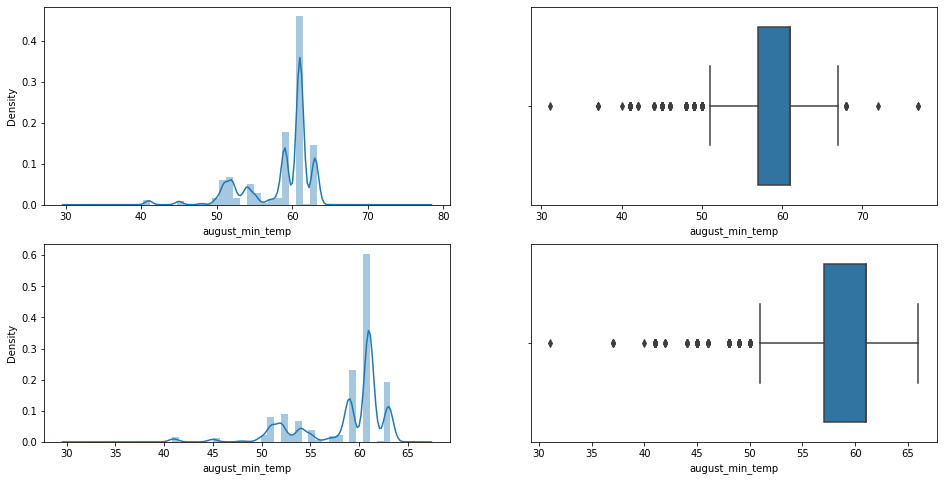

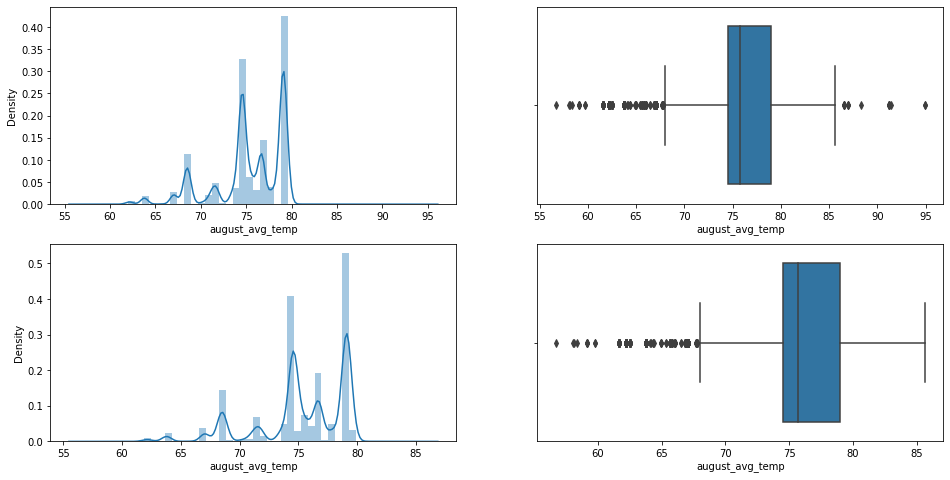

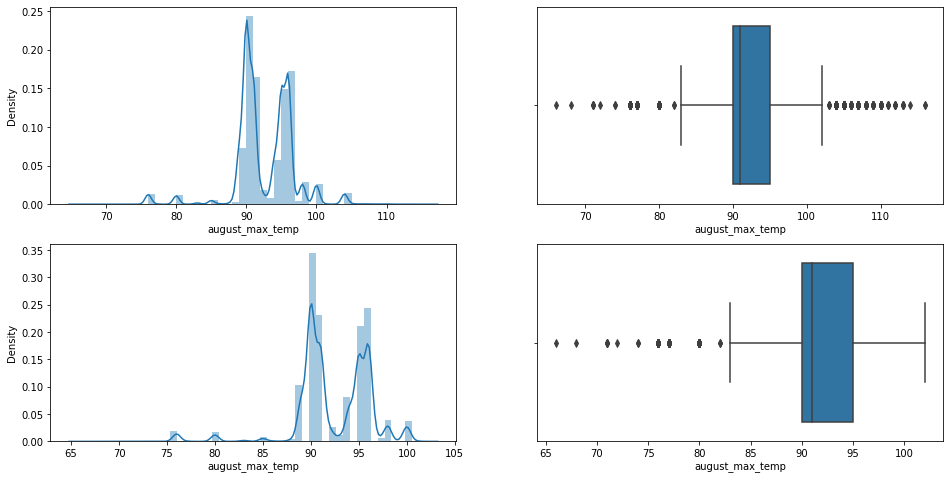

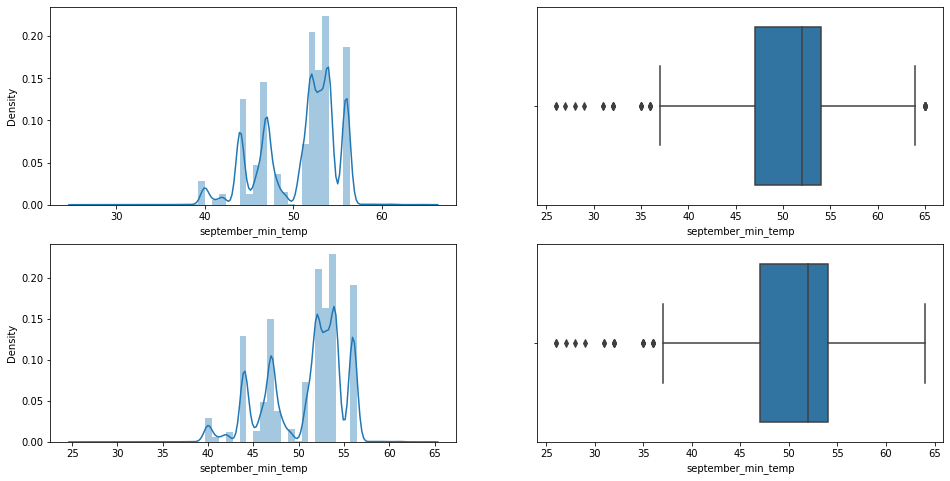

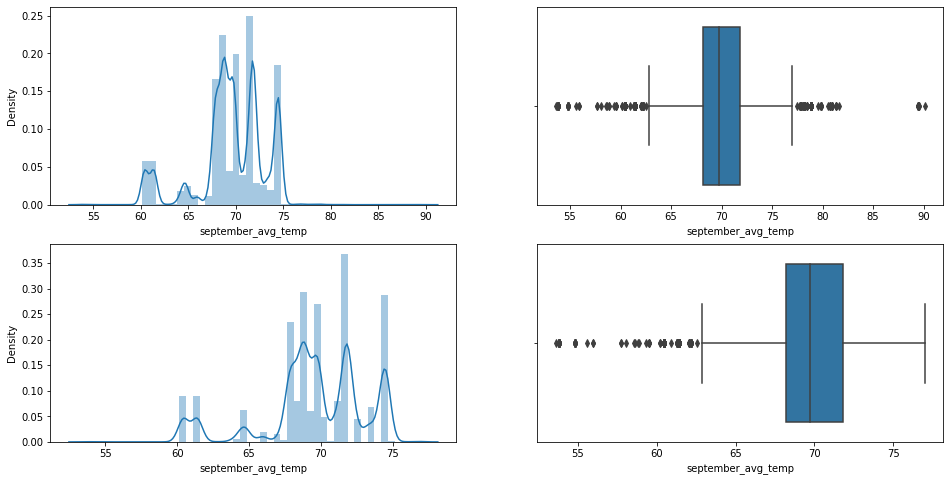

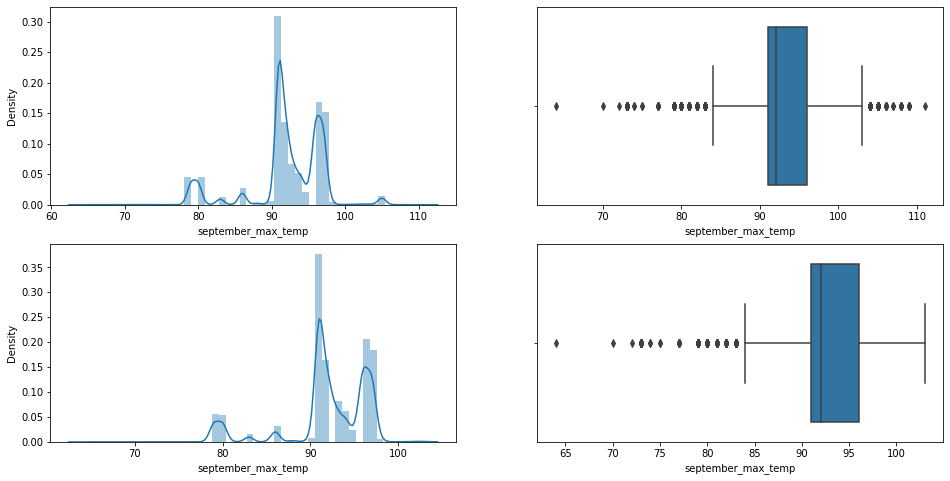

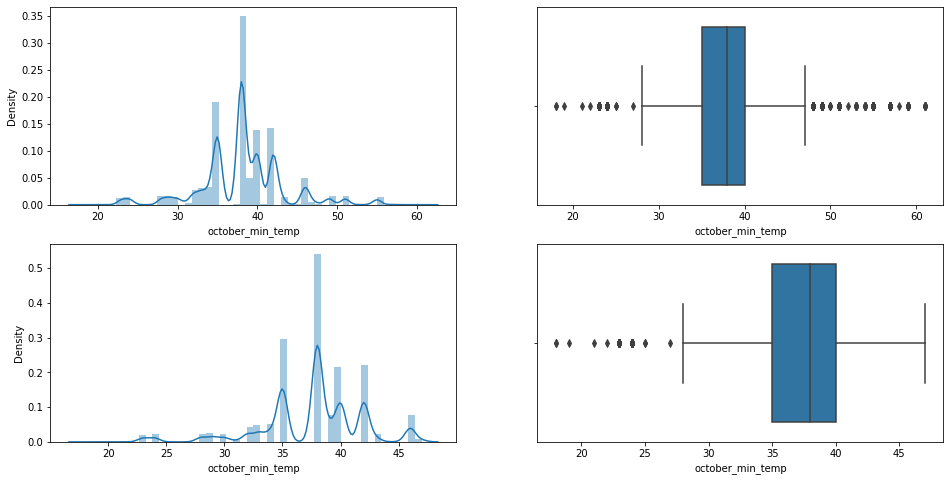

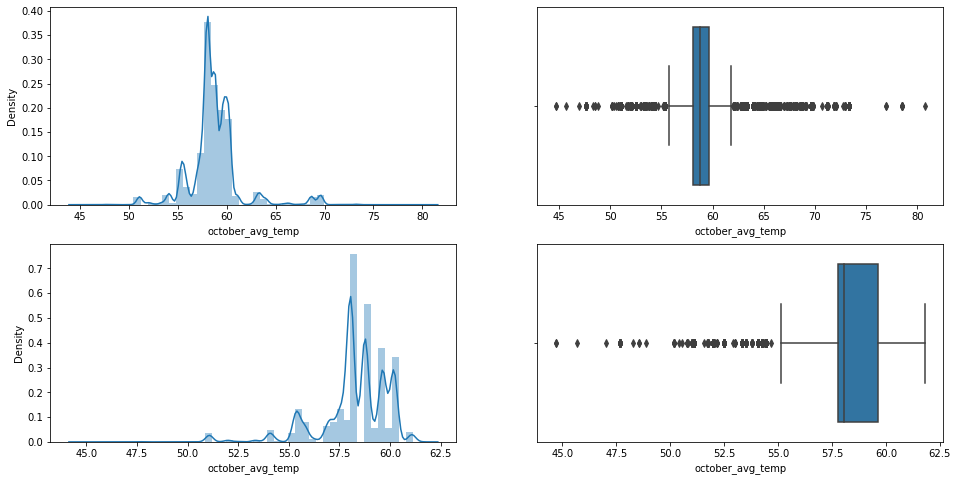

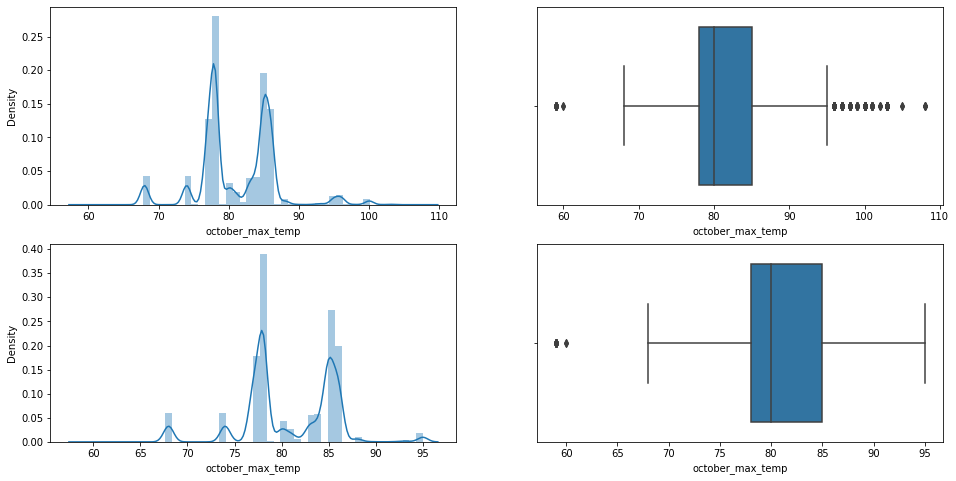

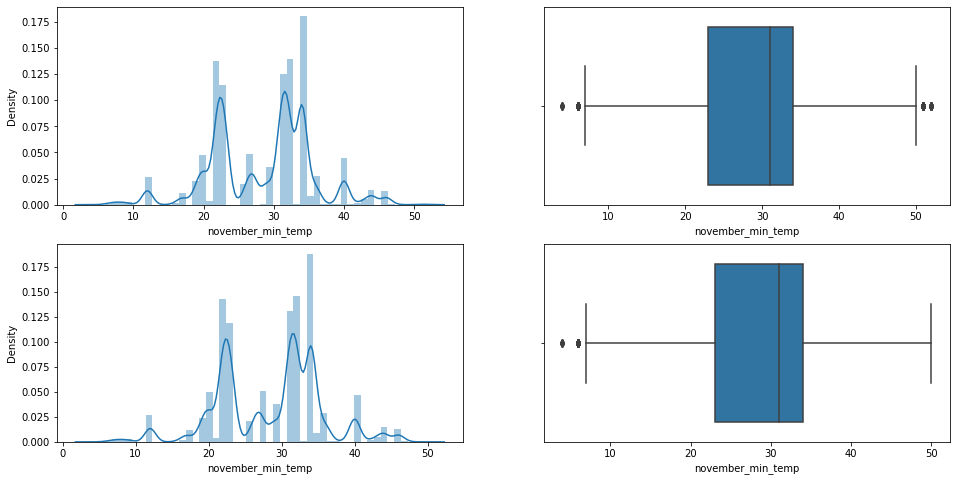

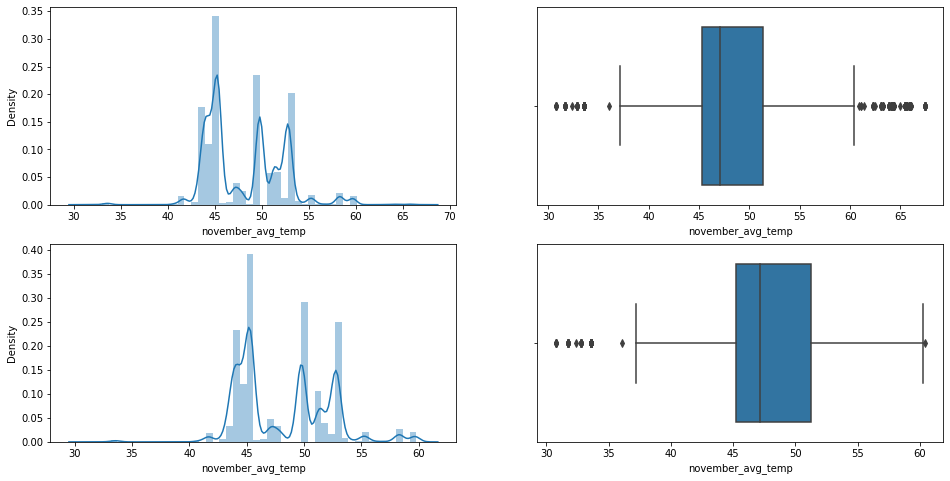

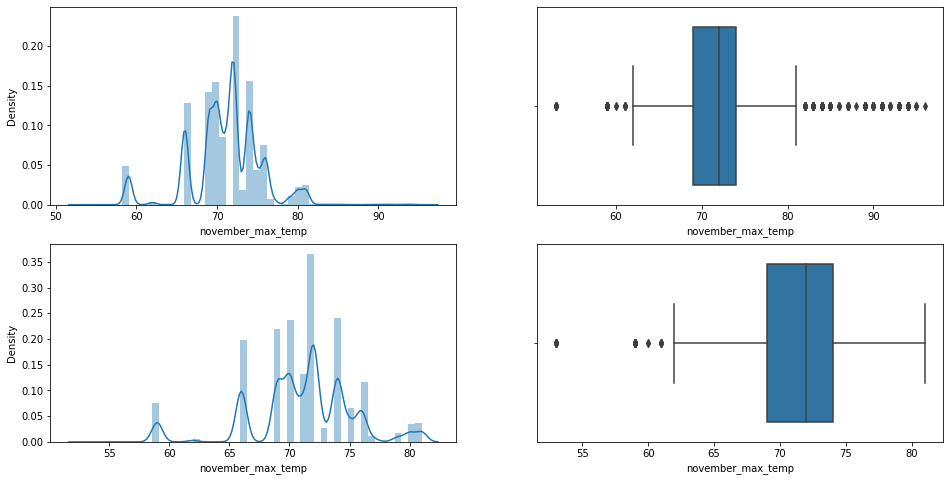

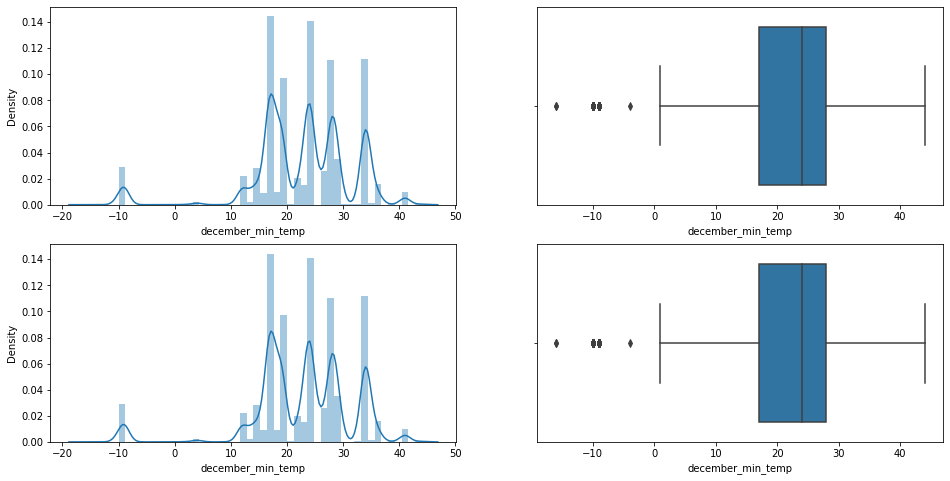

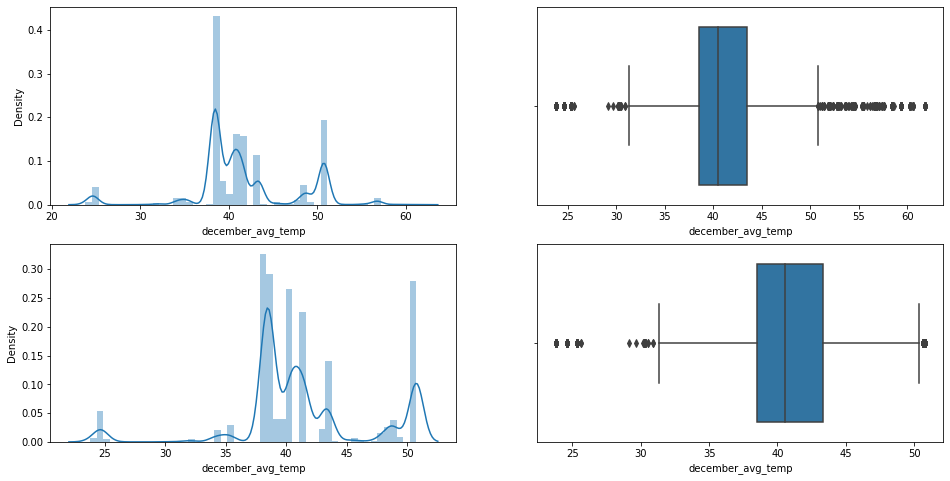

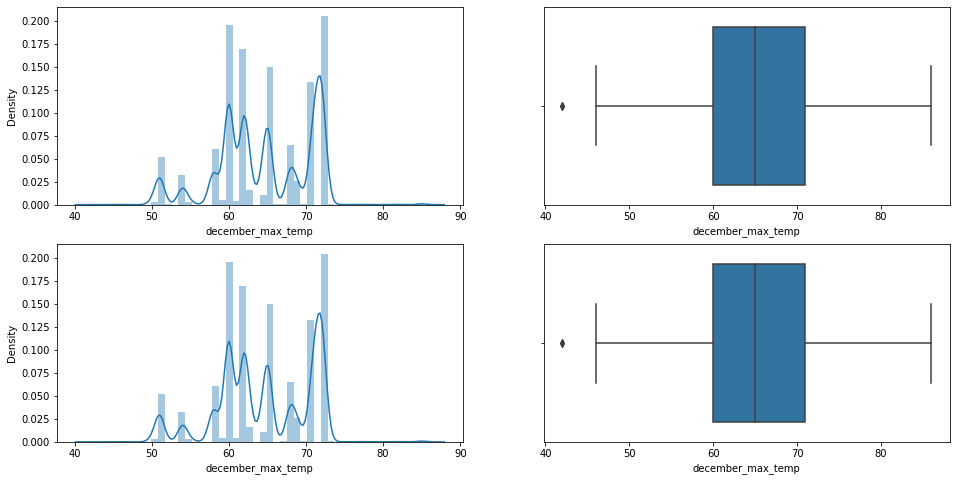

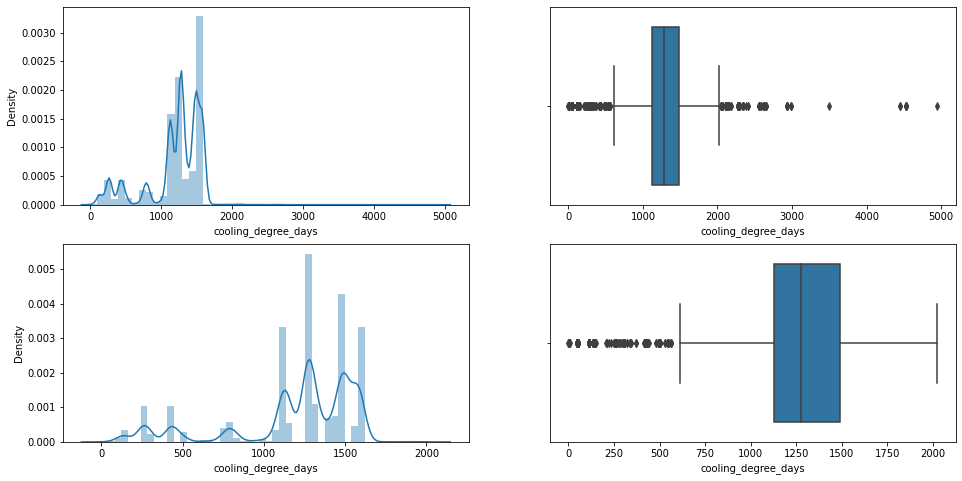

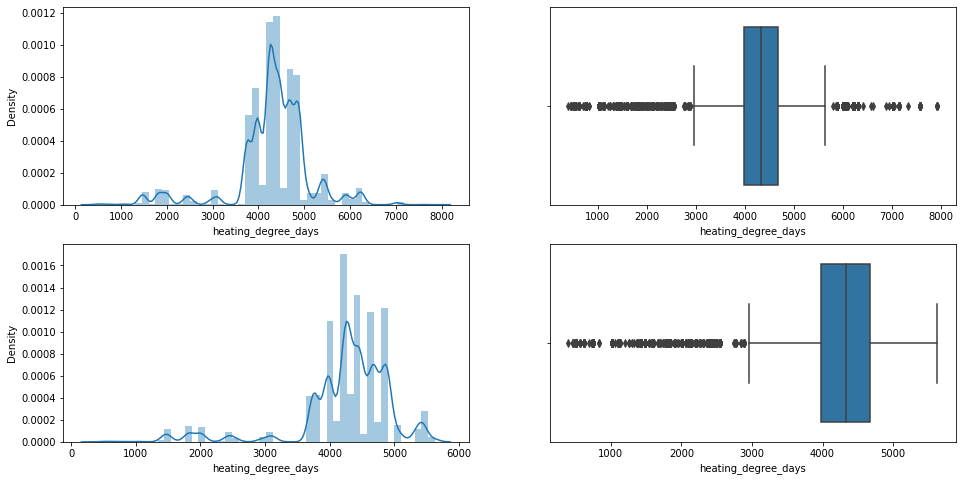

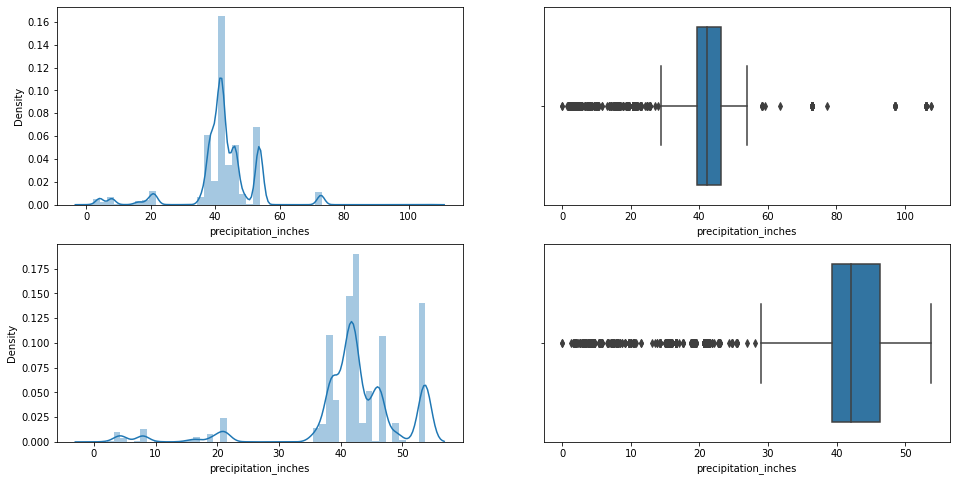

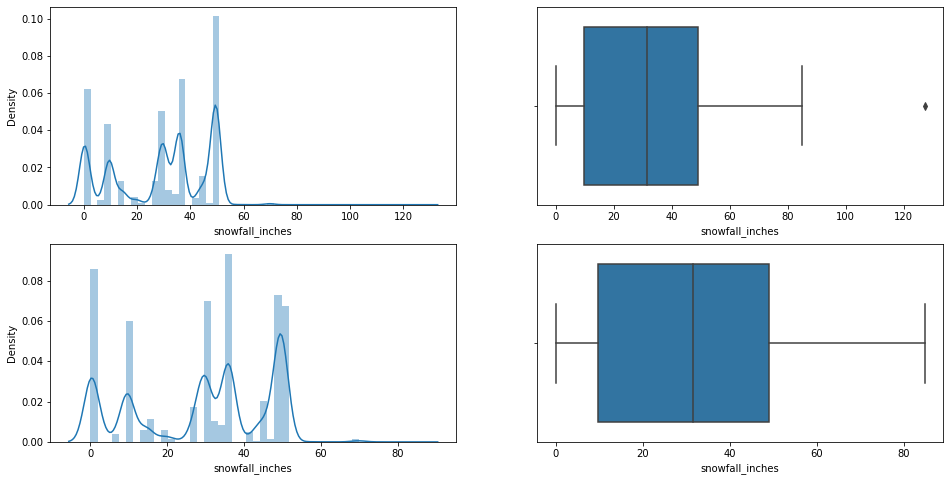

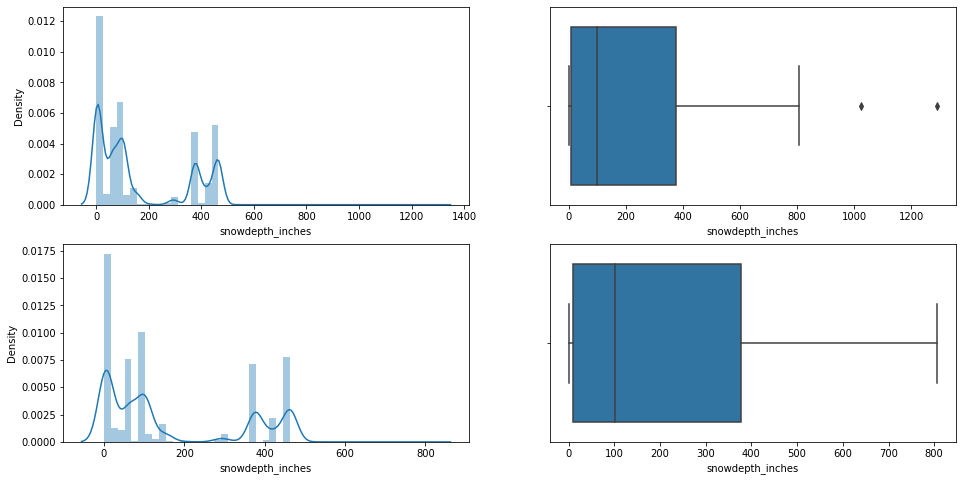

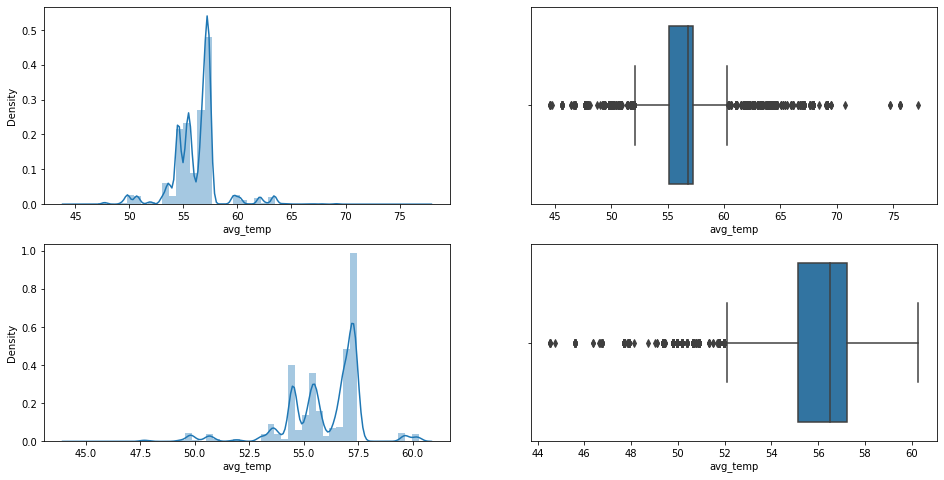

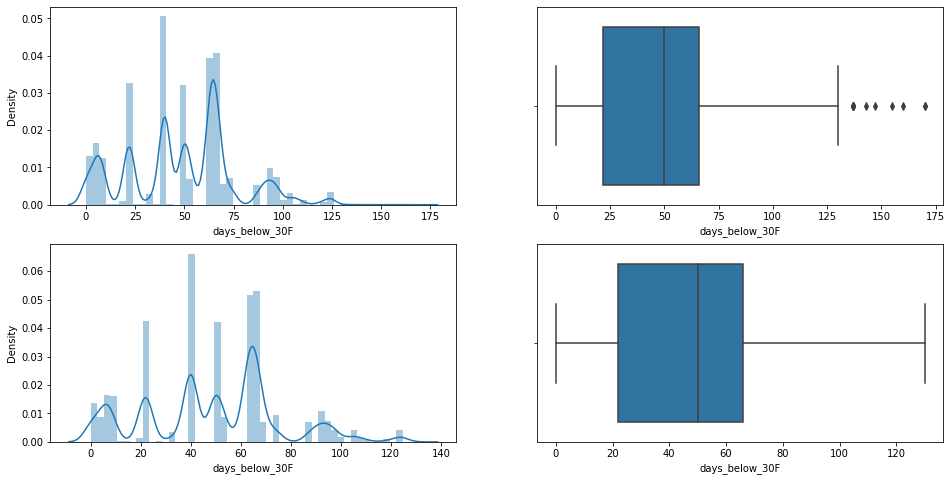

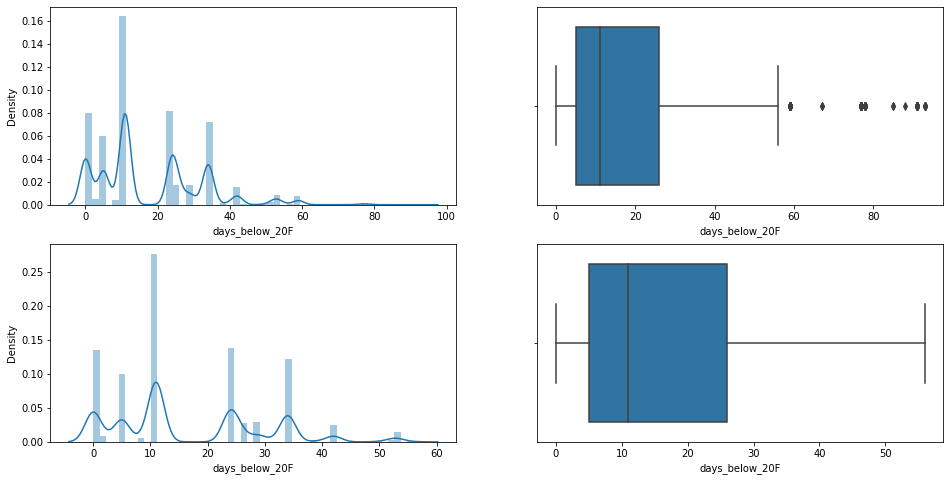

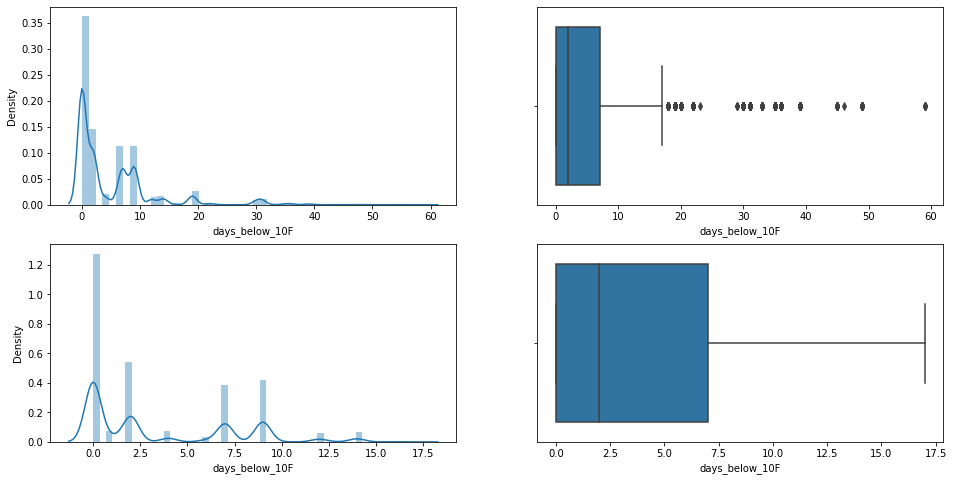

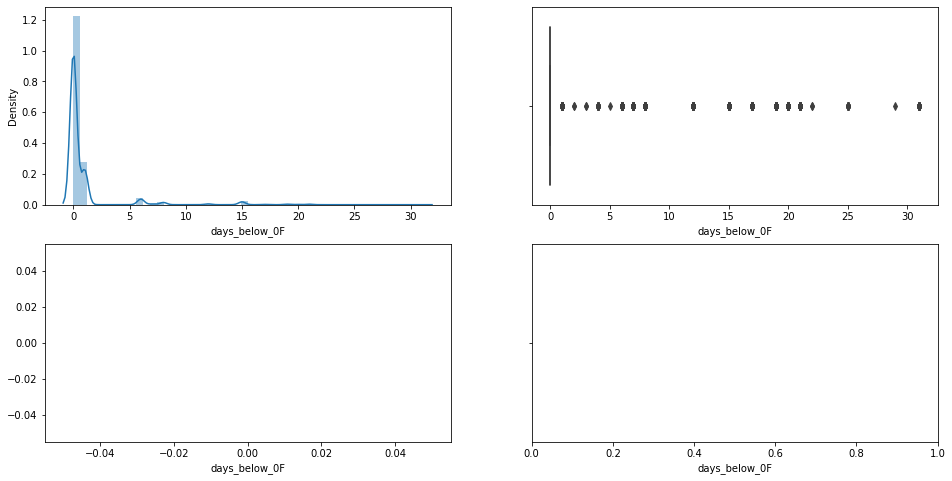

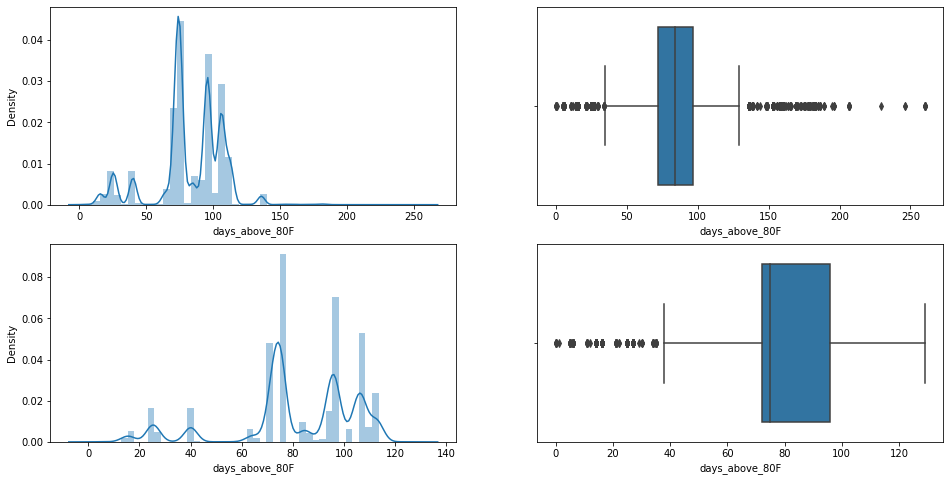

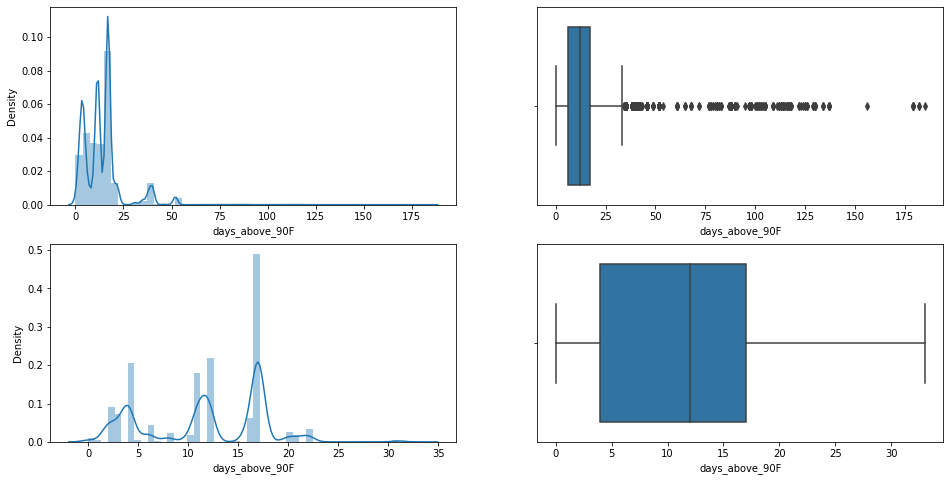

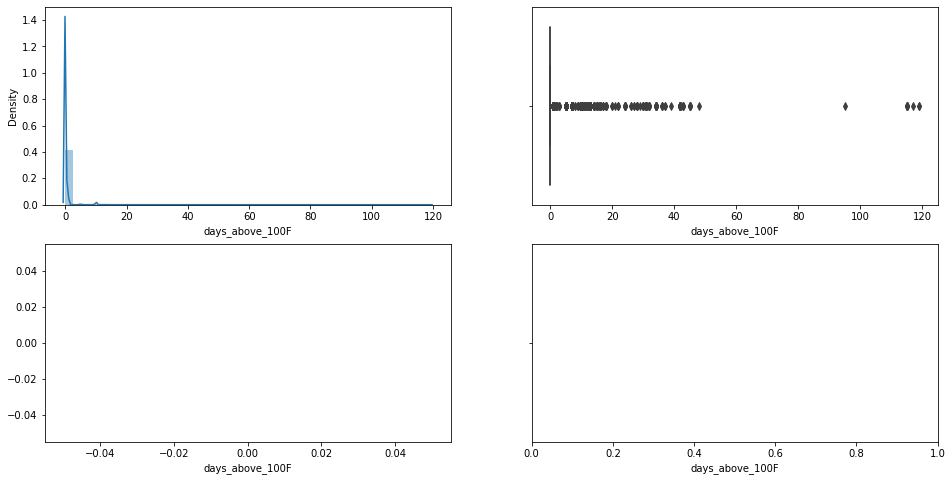

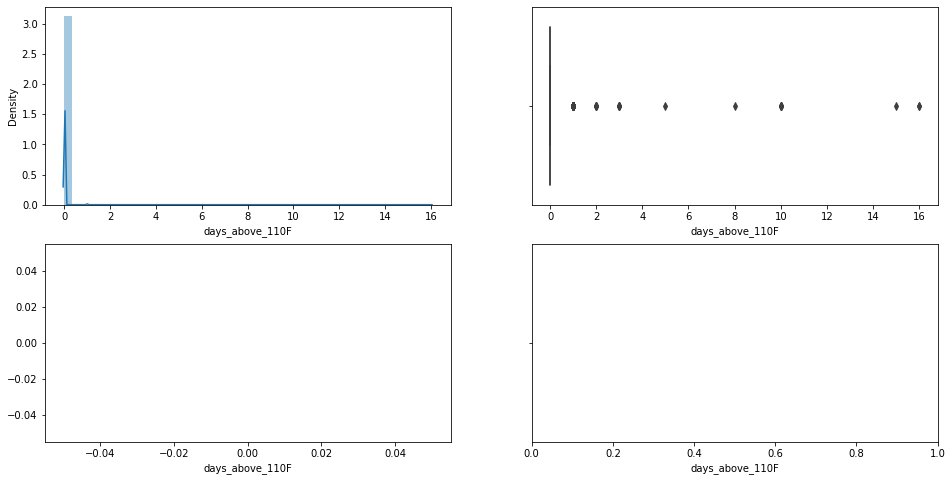

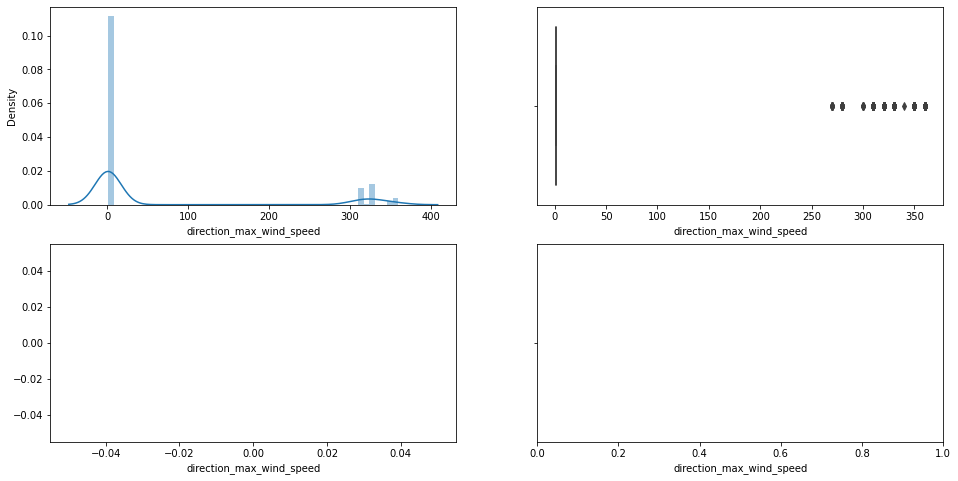

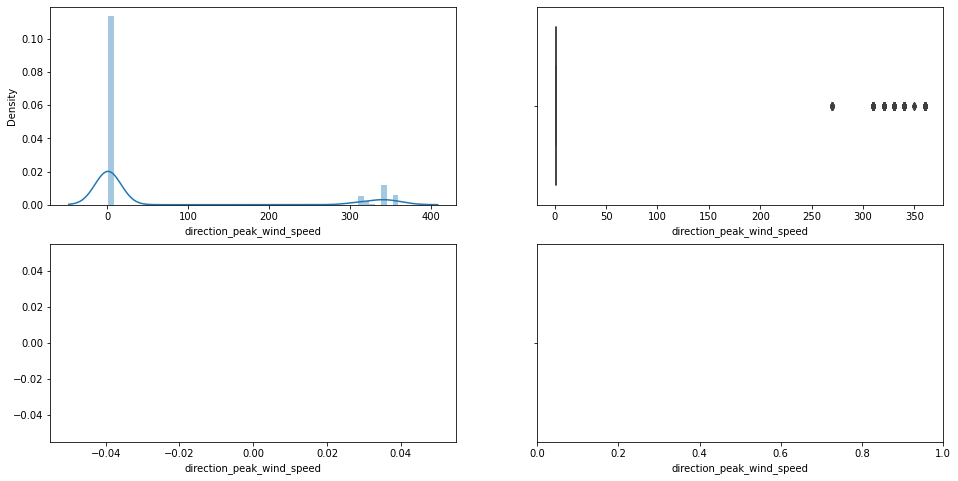

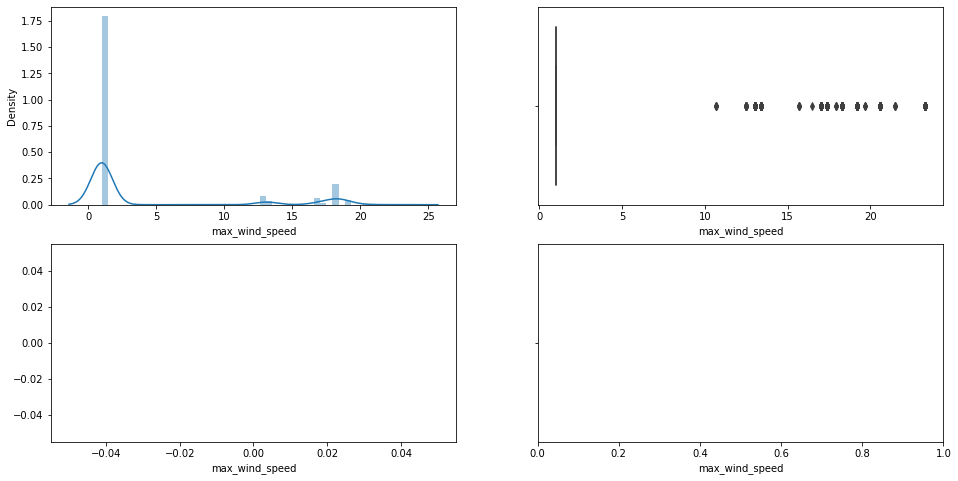

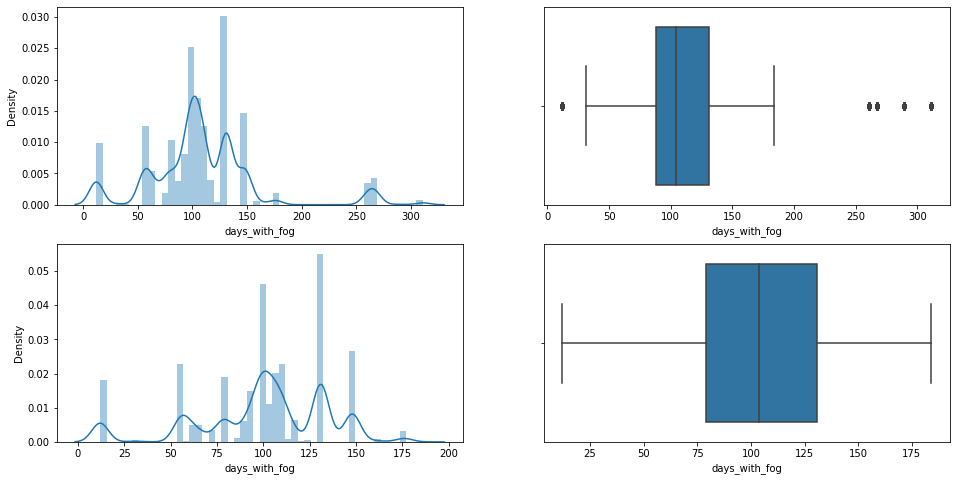

In [21]:
for i in num_col:
    find_outliers(i)

## Distribution of Null value columns

In [22]:
numdata = traindata[col]

In [23]:
def dist(col):
  plt.figure(figsize=(16,6))
  sns.distplot(traindata[col], color = "red")

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

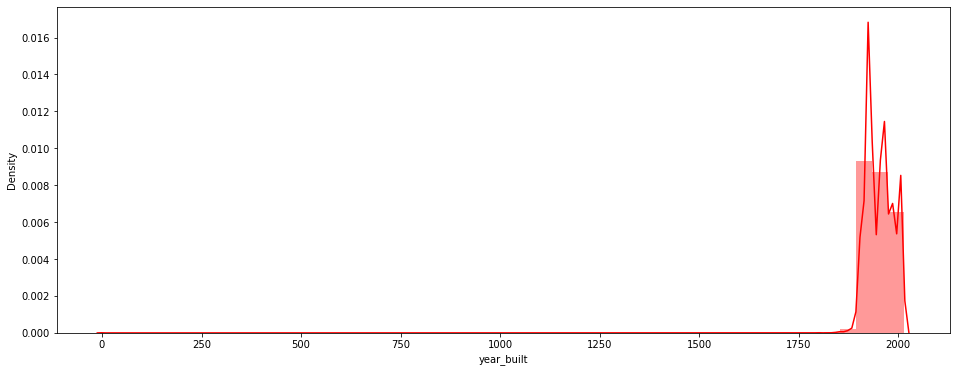

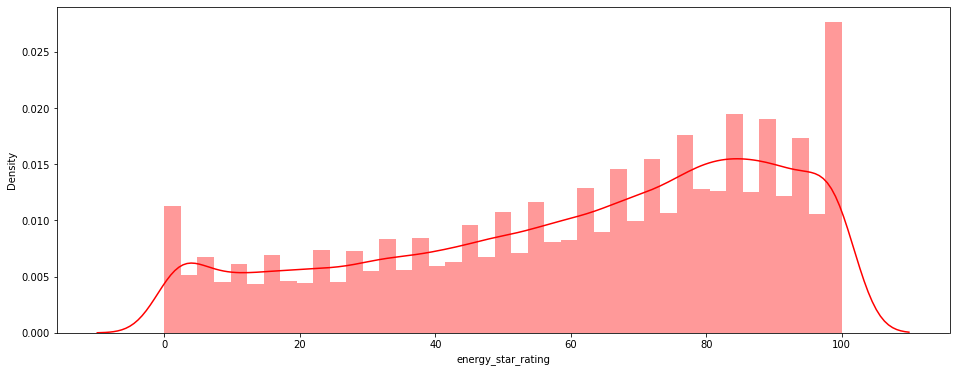

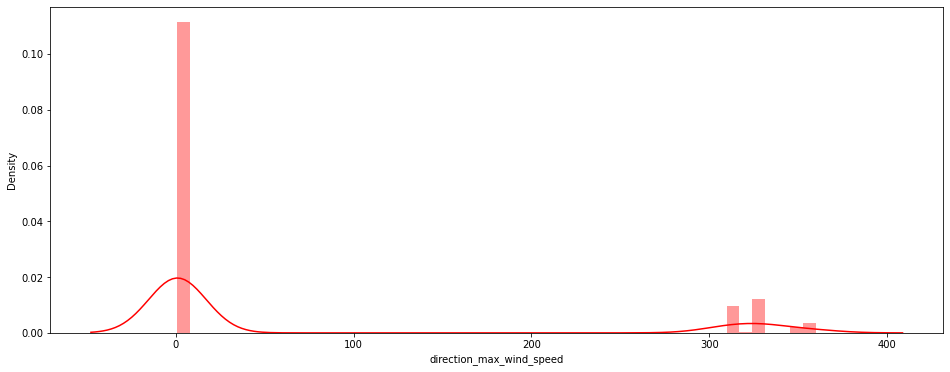

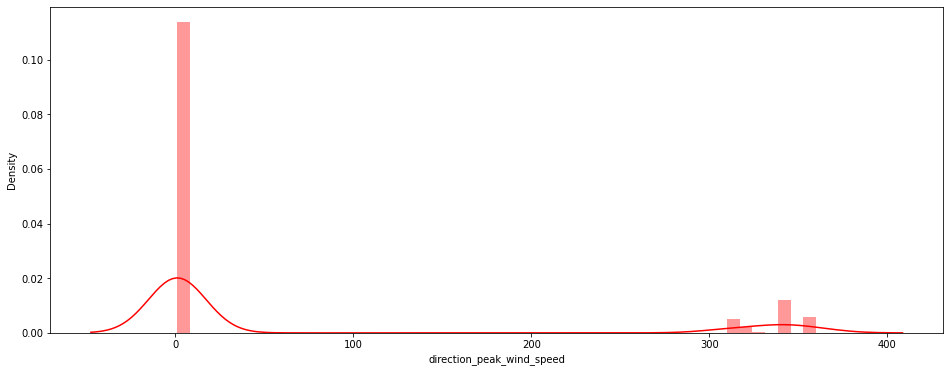

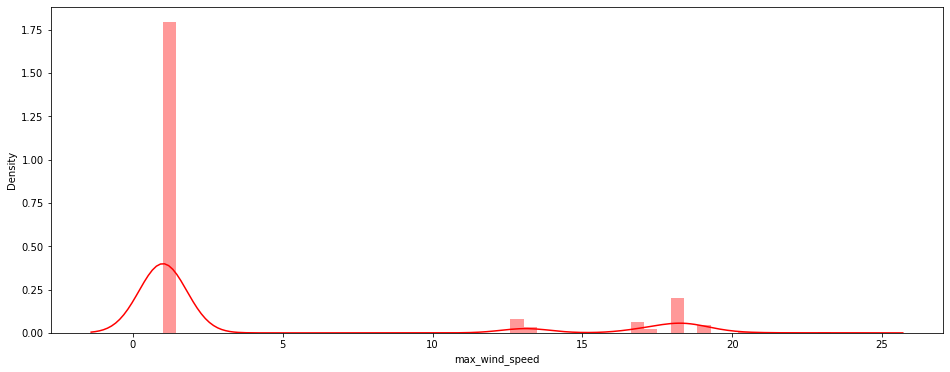

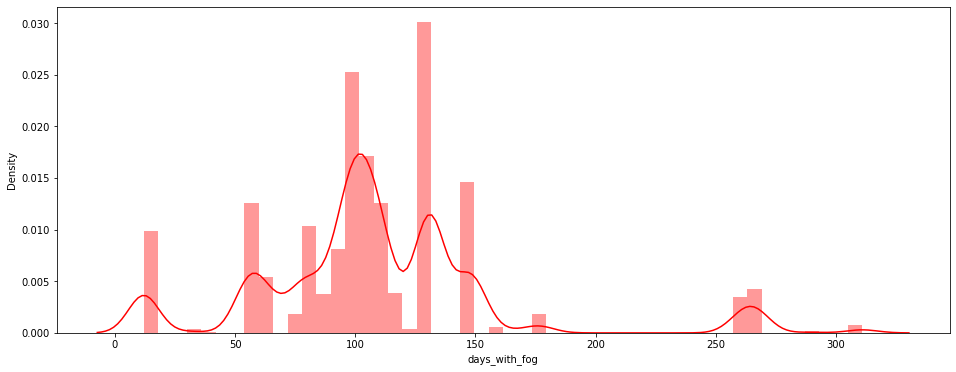

In [24]:
for i in col:
    dist(i)

# KNN Imputer

In [25]:
imputer = sklearn.impute.KNNImputer(n_neighbors=5)

In [33]:
col

['year_built', 'energy_star_rating', 'days_with_fog']

In [32]:
del col[2:3]

In [34]:
imputer.fit(train_num[col])
imputer_test = imputer.transform(train_num[col])

In [35]:
train_num[['yb_test','esr_test','dwf_test']] = imputer_test.tolist()

In [36]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   floor_area                 75757 non-null  float64
 2   year_built                 73920 non-null  float64
 3   energy_star_rating         49048 non-null  float64
 4   ELEVATION                  75757 non-null  float64
 5   january_min_temp           75757 non-null  int64  
 6   january_avg_temp           75757 non-null  float64
 7   january_max_temp           75757 non-null  int64  
 8   february_min_temp          75757 non-null  int64  
 9   february_avg_temp          75757 non-null  float64
 10  february_max_temp          75757 non-null  int64  
 11  march_min_temp             75757 non-null  int64  
 12  march_avg_temp             75757 non-null  float64
 13  march_max_temp             75757 non-null  int

In [37]:
train_num

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,yb_test,esr_test,dwf_test
0,1,61242.0,1942.0,11.0,2.4,36,50.500000,68,35,50.589286,...,0,0,0,1.0,1.0,1.0,NaN,1942.0,11.0,68.8
1,1,274000.0,1955.0,45.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,1.0,NaN,1.0,12.0,1955.0,45.0,12.0
2,1,280025.0,1951.0,97.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,1.0,NaN,1.0,12.0,1951.0,97.0,12.0
3,1,55325.0,1980.0,46.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,1.0,NaN,1.0,12.0,1980.0,46.0,12.0
4,1,66000.0,1985.0,100.0,2.4,36,50.500000,68,35,50.589286,...,0,0,0,1.0,1.0,1.0,NaN,1985.0,100.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,...,3,0,0,NaN,NaN,NaN,NaN,1995.0,8.0,67.6
75753,6,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,...,3,0,0,NaN,NaN,NaN,NaN,1910.0,98.0,53.2
75754,6,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,...,0,0,0,NaN,NaN,NaN,NaN,1917.0,73.2,95.4
75755,6,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,...,0,0,0,NaN,NaN,NaN,NaN,2012.0,61.2,113.0


In [41]:
def dist(col):
  plt.figure(figsize=(16,6))
  sns.distplot(train_num[col], color = "red")

In [39]:
columnss = ['yb_test','esr_test','dwf_test']

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

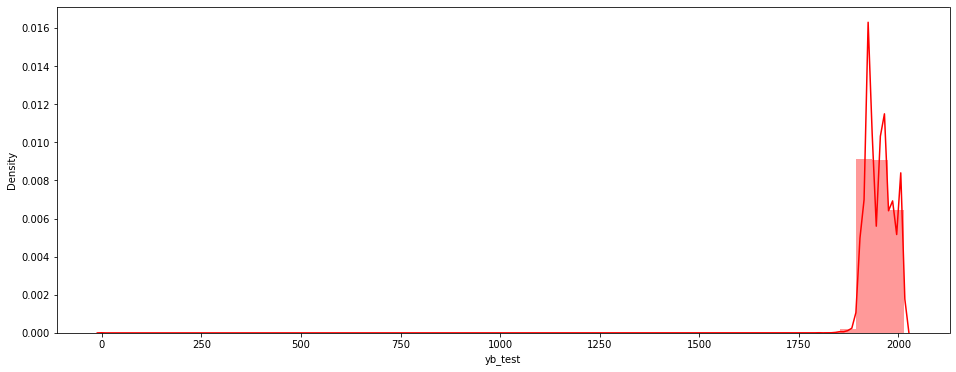

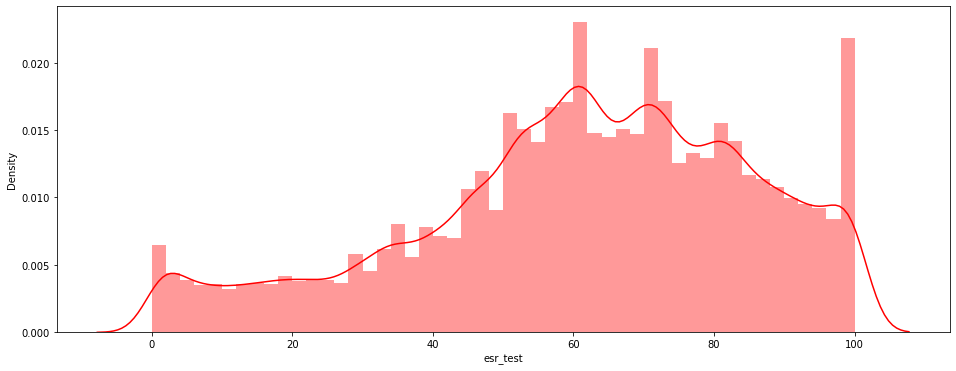

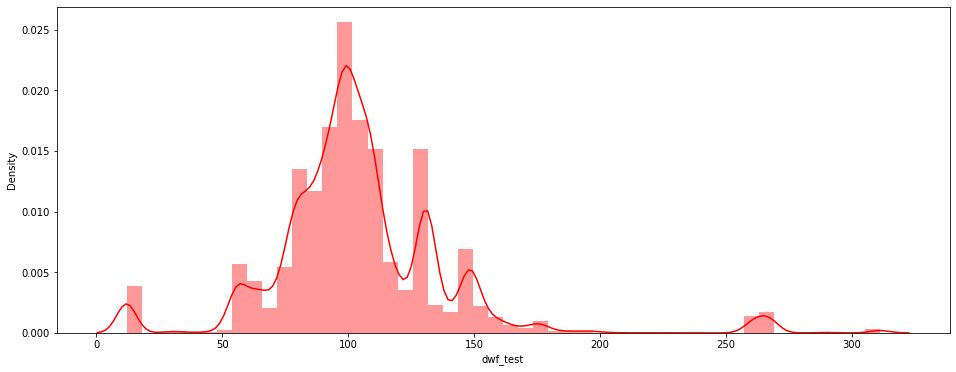

In [42]:
for i in columnss:
    dist(i)

# Simple Imputer (With Most frequent)

In [43]:
simplecol = list(missingpercol.index)

In [44]:
simplecol = simplecol[2:5]

In [46]:
imp_simple = sklearn.impute.SimpleImputer(missing_values=np.nan,strategy="most_frequent")
simp_imput = imp_simple.fit_transform(traindata[simplecol])

In [47]:
train_num[['smws_test','dpws_test','mws_test']] = imputer_test.tolist()

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

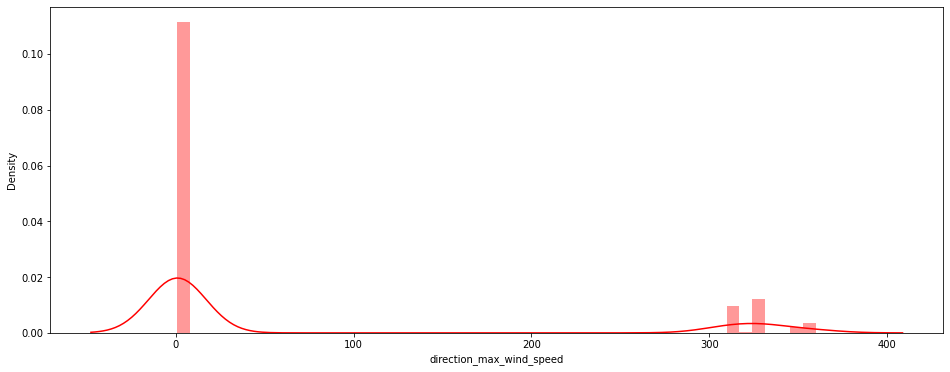

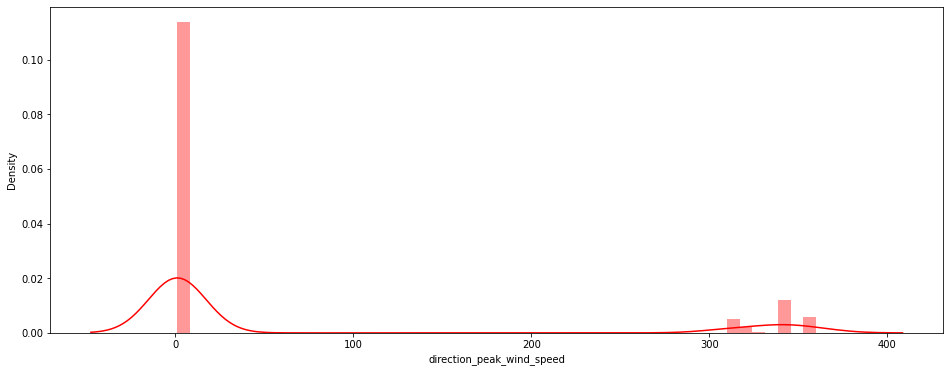

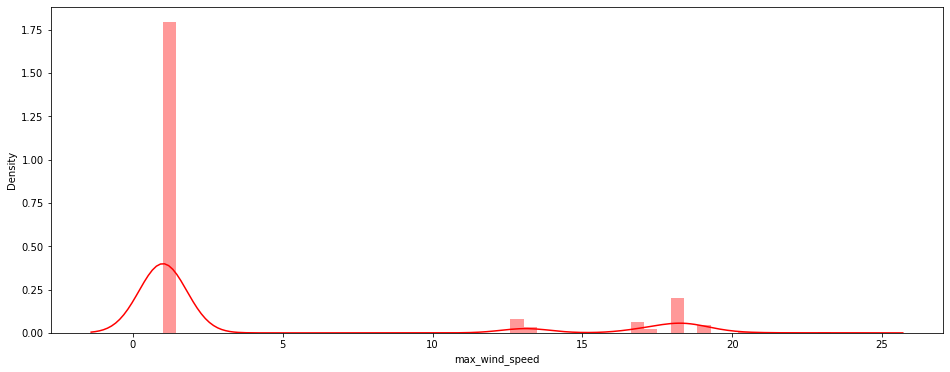

In [48]:
for i in simplecol:
    dist(i)